<a href="https://colab.research.google.com/github/aulia-anhar/Kasus4_Data_Mining/blob/main/Assignement_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Input Data dan Library**

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
file_path = '/content/drive/MyDrive/Semester 5/Data mining/Kasus 4/Luas Panen, Produksi, dan Produktivitas Padi Menurut Provinsi, 2018-2024.xlsx'
df = pd.ExcelFile(file_path)


In [5]:
# Baca sheet pertama dari file Excel (Anda mungkin perlu mengubah nama sheet jika berbeda)
data = df.parse(df.sheet_names[0])

# Sekarang 'data' adalah DataFrame, dan Anda dapat menggunakan .head(),
print(data.head())


      38 Provinsi    HA 2018    HA 2019    HA 2020    HA 2021    HA 2022  \
0            ACEH  329515.78  310012.46  317869.41  297058.38  271750.20   
1  SUMATERA UTARA  408176.45  413141.24  388591.22  385405.00  411462.10   
2  SUMATERA BARAT  313050.82  311671.23  295664.47  272391.95  271883.10   
3            RIAU   71448.08   63142.04   64733.13   53062.35   51054.04   
4           JAMBI   86202.68   69536.06   84772.93   64412.26   60539.59   

     HA 2023    HA 2024  KU/HA 2018  KU/HA 2019  ...  KU/HA 2022  KU/HA 2023  \
0  254287.38  301081.97       56.49       55.30  ...       55.55       55.22   
1  406109.49  419089.12       51.65       50.32  ...       50.76        51.4   
2  300564.77  296215.93       47.37       47.58  ...       50.52       49.32   
3   51914.14   57003.35       37.28       36.56  ...       41.83       39.68   
4   61236.64   64119.24       44.44       44.57  ...       45.88       45.06   

   KU/HA 2024    TON 2018    TON 2019    TON 2020    TON 2021 

In [6]:
#.info(), dan .describe()
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   38 Provinsi  38 non-null     object 
 1   HA 2018      34 non-null     object 
 2   HA 2019      34 non-null     float64
 3   HA 2020      34 non-null     object 
 4   HA 2021      34 non-null     float64
 5   HA 2022      34 non-null     float64
 6   HA 2023      38 non-null     object 
 7   HA 2024      38 non-null     float64
 8   KU/HA 2018   34 non-null     float64
 9   KU/HA 2019   34 non-null     float64
 10  KU/HA 2020   34 non-null     float64
 11  KU/HA 2021   34 non-null     float64
 12  KU/HA 2022   34 non-null     float64
 13  KU/HA 2023   38 non-null     object 
 14  KU/HA 2024   38 non-null     float64
 15  TON 2018     34 non-null     float64
 16  TON 2019     34 non-null     float64
 17  TON 2020     34 non-null     float64
 18  TON 2021     34 non-null     float64
 19  TON 2022  

# **Tangani Data Kosong**

In [7]:


# Function to convert object columns to numeric, excluding specific columns
def convert_to_numeric(df, exclude_columns=[]):
    df = df.copy()  # Hindari modifikasi DataFrame asli
    for col in df.columns:
        if col not in exclude_columns and df[col].dtype == 'object':
            df[col] = df[col].astype(str).str.replace(',', '.', regex=False)  # Ganti koma dengan titik
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Konversi ke numerik
    return df

# Daftar kolom yang ingin dikecualikan dari konversi
exclude_columns = ['38 Provinsi']  # Ganti dengan nama kolom provinsi

# Convert object columns to numeric, excluding specific columns
data = convert_to_numeric(data, exclude_columns=exclude_columns)

# Fill missing values with column mean (hanya numerik)
numeric_cols = data.select_dtypes(include='number').columns  # Pilih kolom numerik
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Output hasil
print(data.head())
print(data.info())


      38 Provinsi    HA 2018    HA 2019    HA 2020    HA 2021    HA 2022  \
0            ACEH  329515.78  310012.46  317869.41  297058.38  271750.20   
1  SUMATERA UTARA  408176.45  413141.24  388591.22  385405.00  411462.10   
2  SUMATERA BARAT  313050.82  311671.23  295664.47  272391.95  271883.10   
3            RIAU   71448.08   63142.04   64733.13   53062.35   51054.04   
4           JAMBI   86202.68   69536.06   84772.93   64412.26   60539.59   

     HA 2023    HA 2024  KU/HA 2018  KU/HA 2019  ...  KU/HA 2022  KU/HA 2023  \
0  254287.38  301081.97       56.49       55.30  ...       55.55       55.22   
1  406109.49  419089.12       51.65       50.32  ...       50.76       51.40   
2  300564.77  296215.93       47.37       47.58  ...       50.52       49.32   
3   51914.14   57003.35       37.28       36.56  ...       41.83       39.68   
4   61236.64   64119.24       44.44       44.57  ...       45.88       45.06   

   KU/HA 2024    TON 2018    TON 2019    TON 2020    TON 2021 

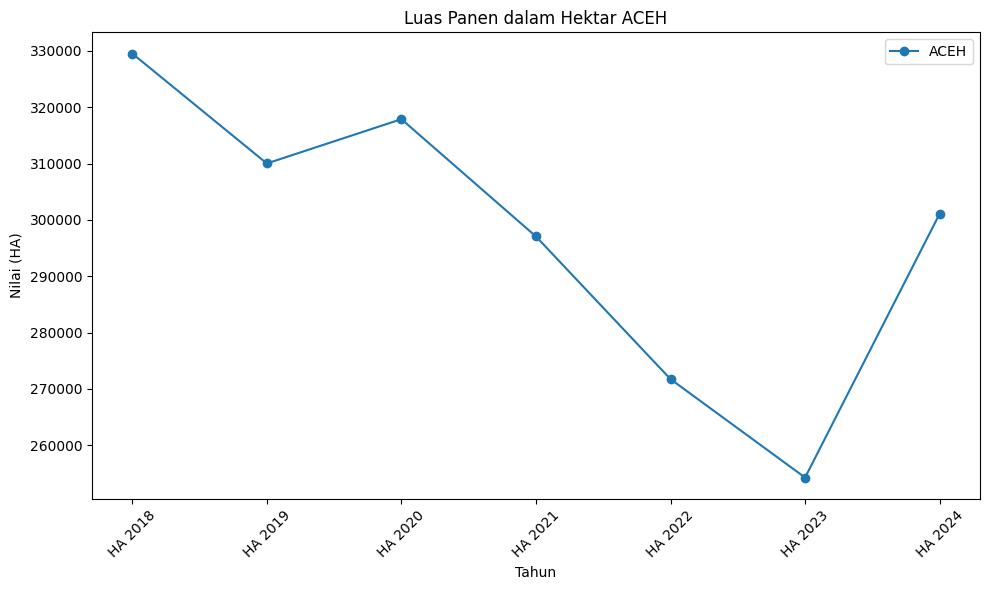

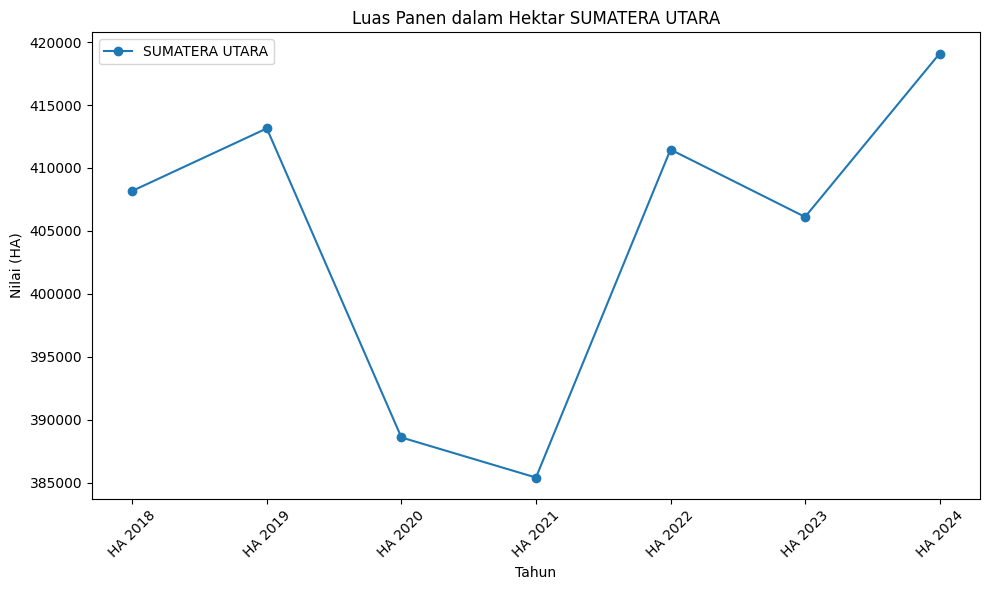

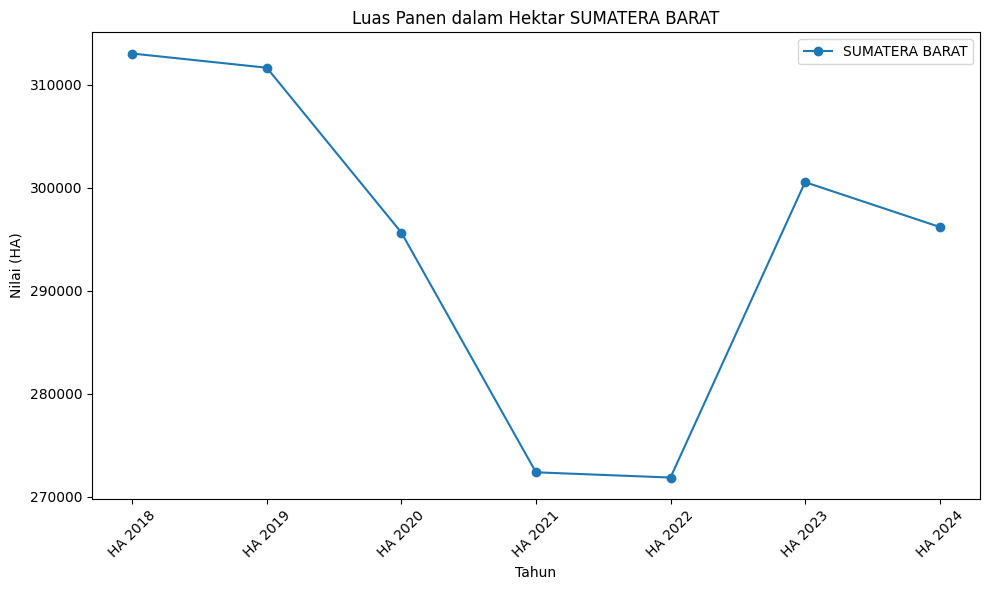

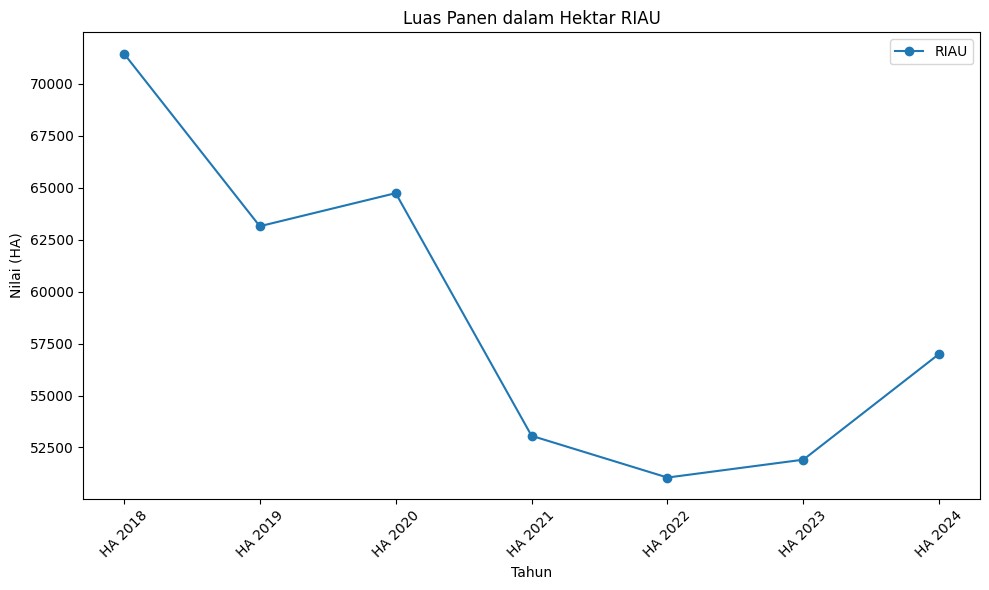

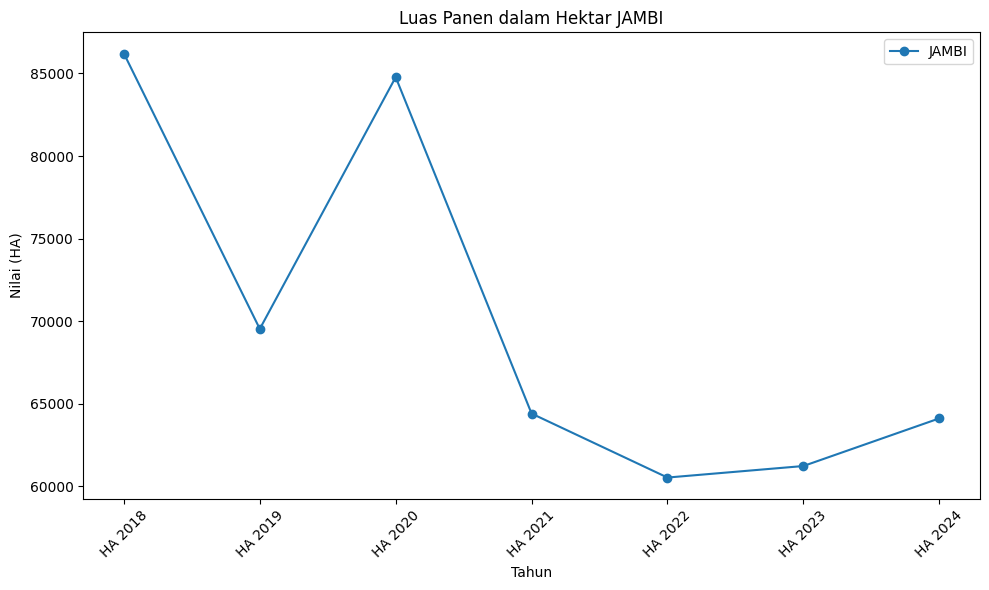

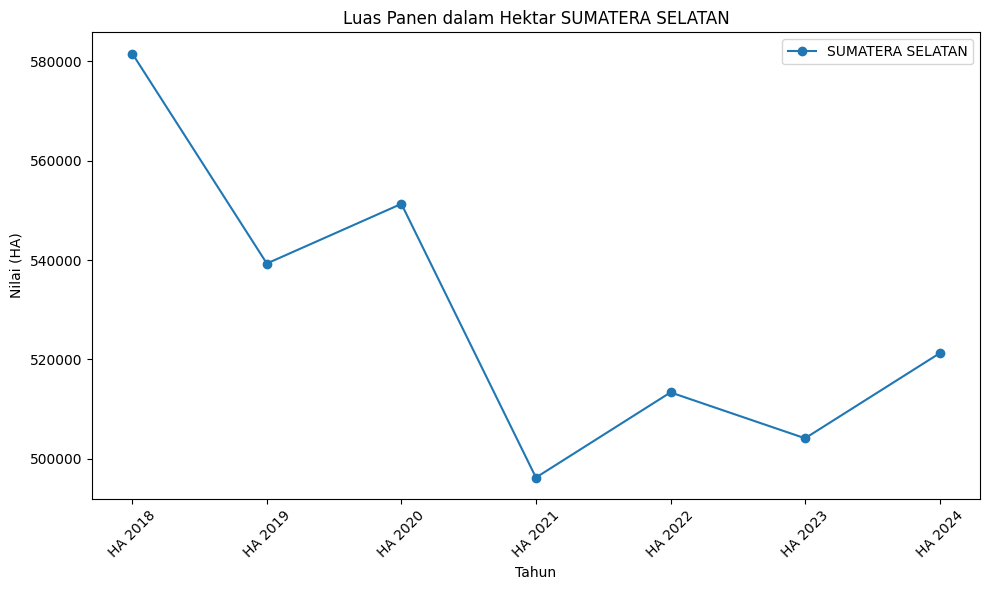

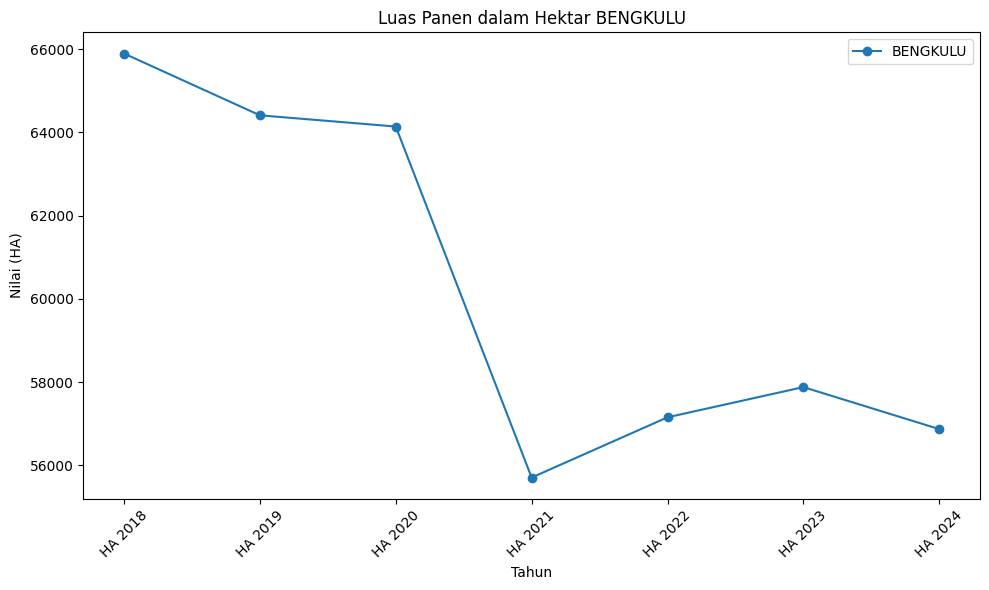

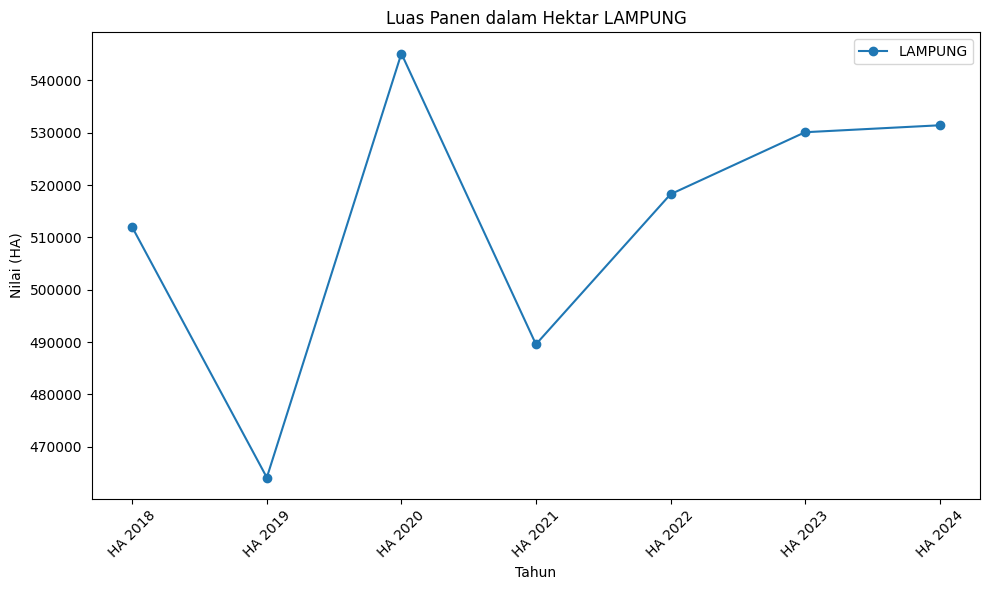

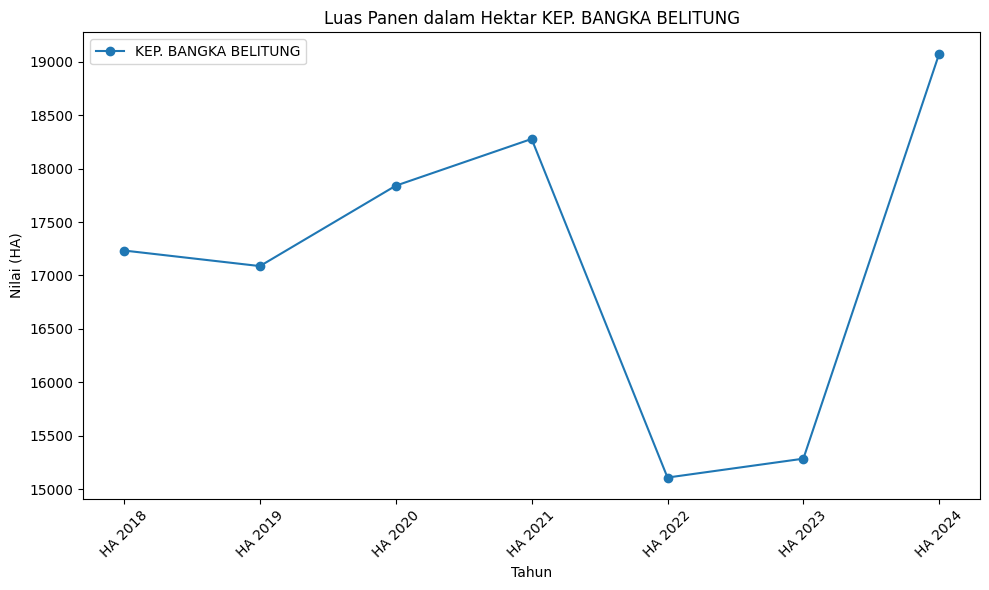

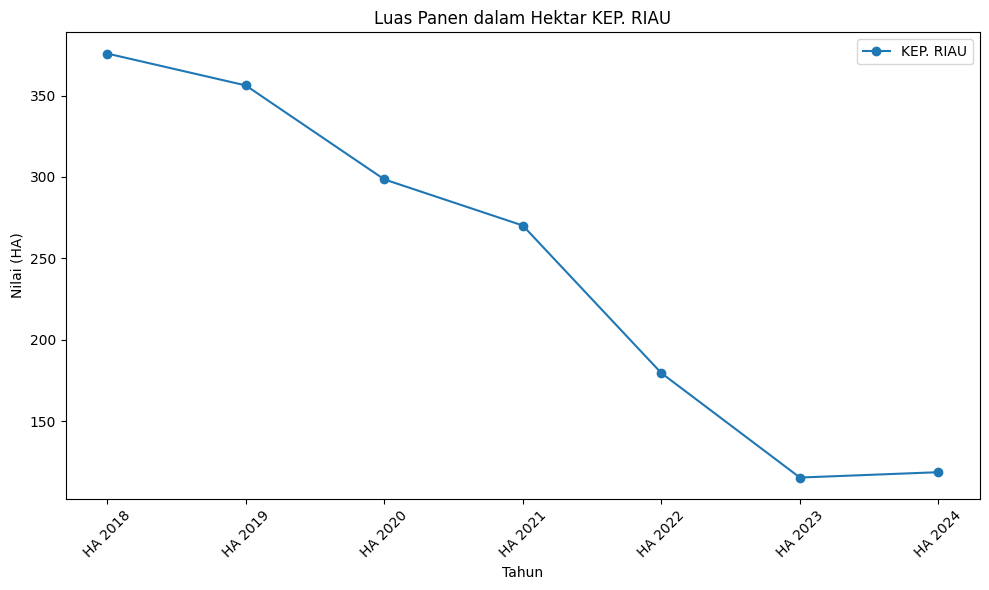

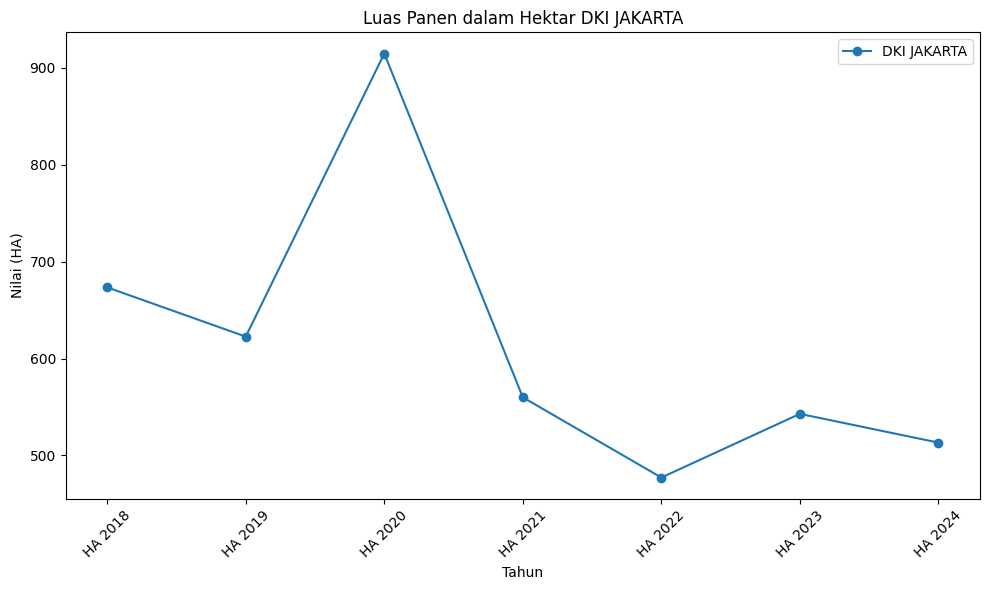

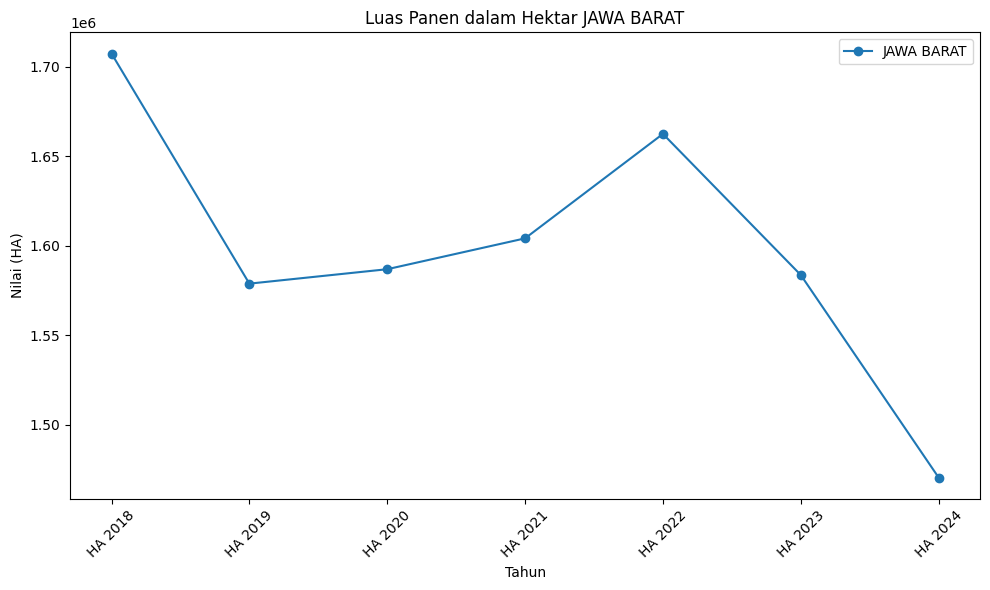

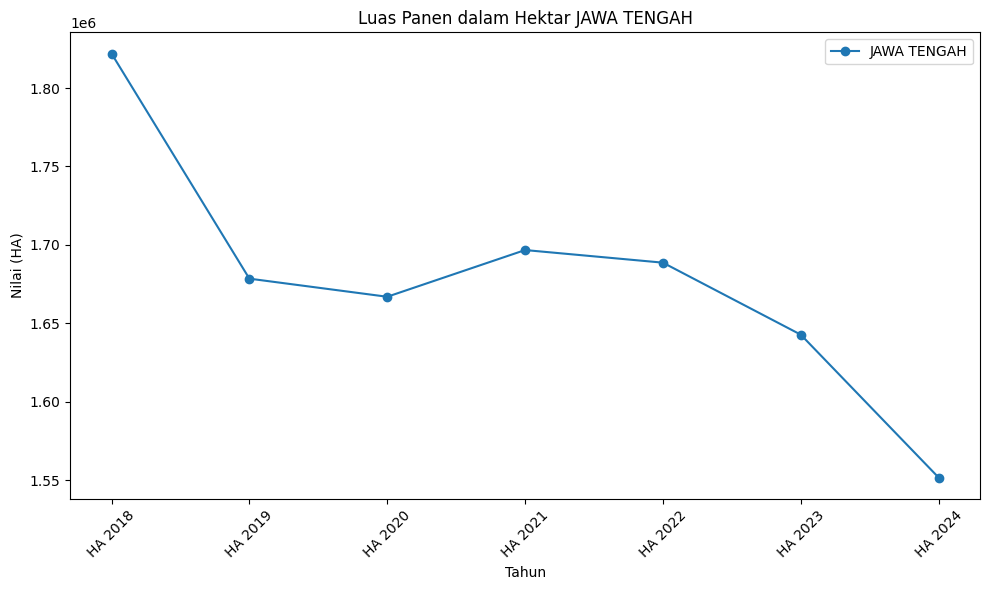

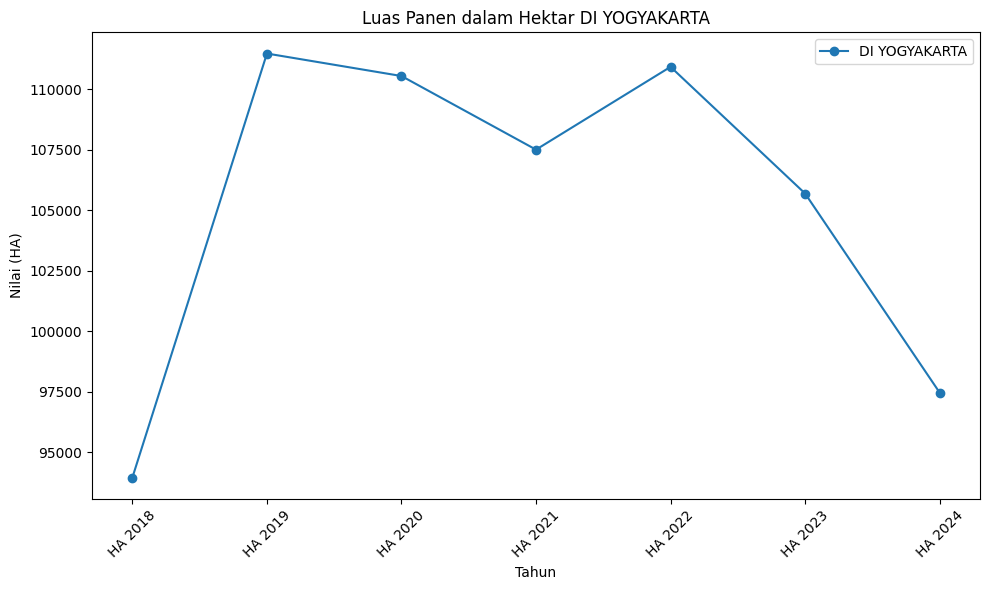

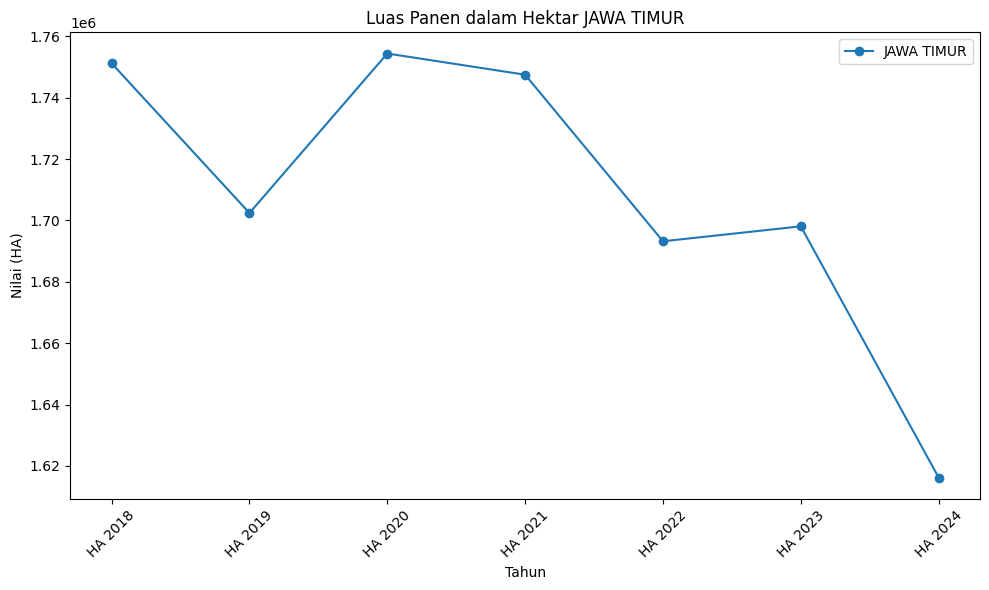

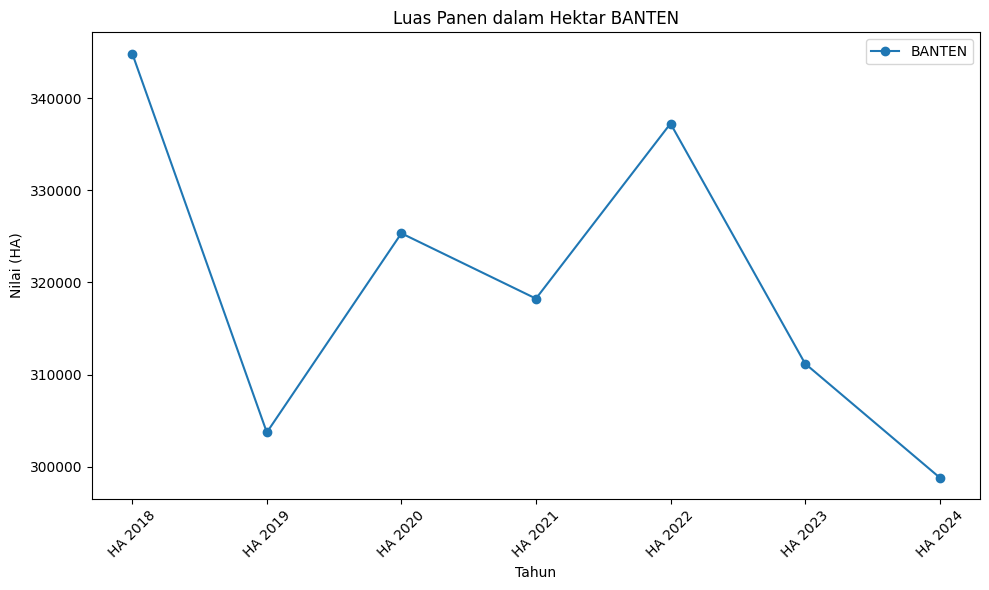

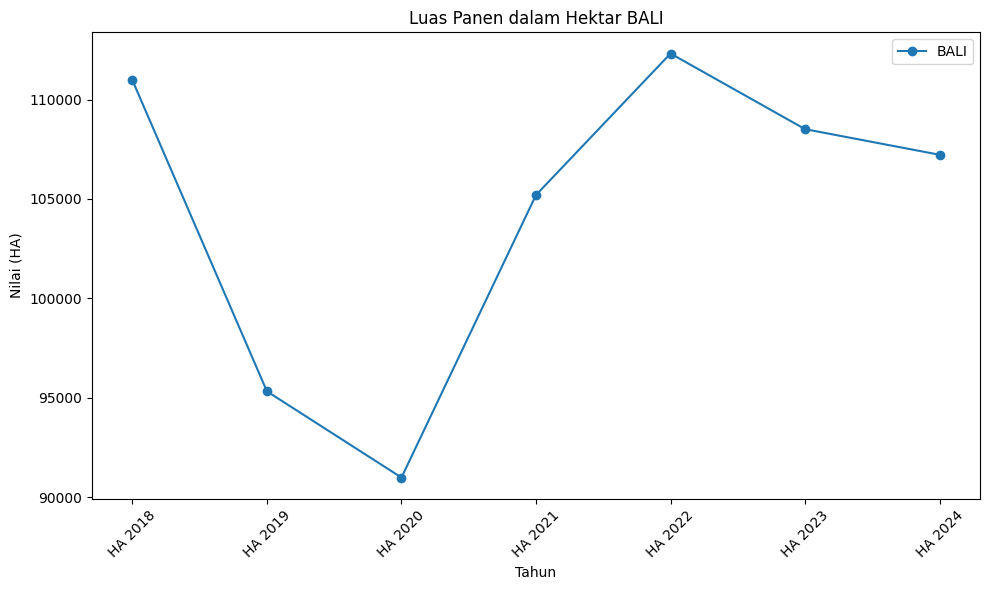

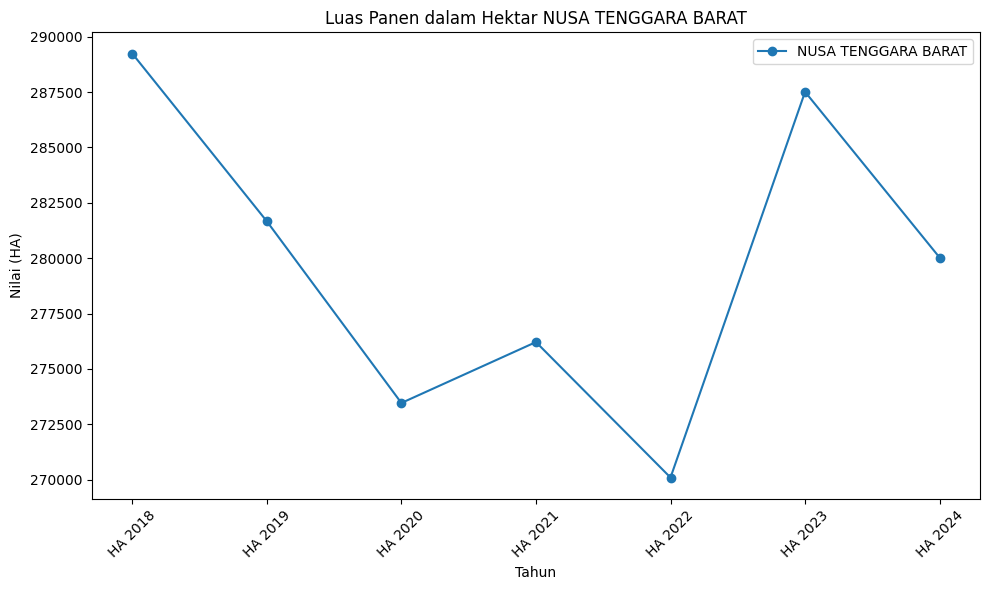

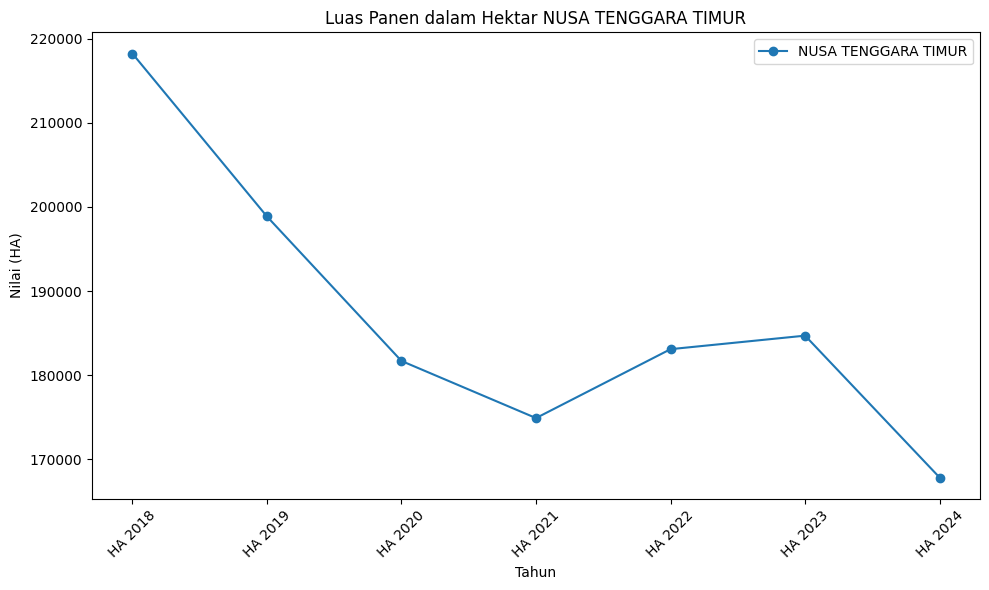

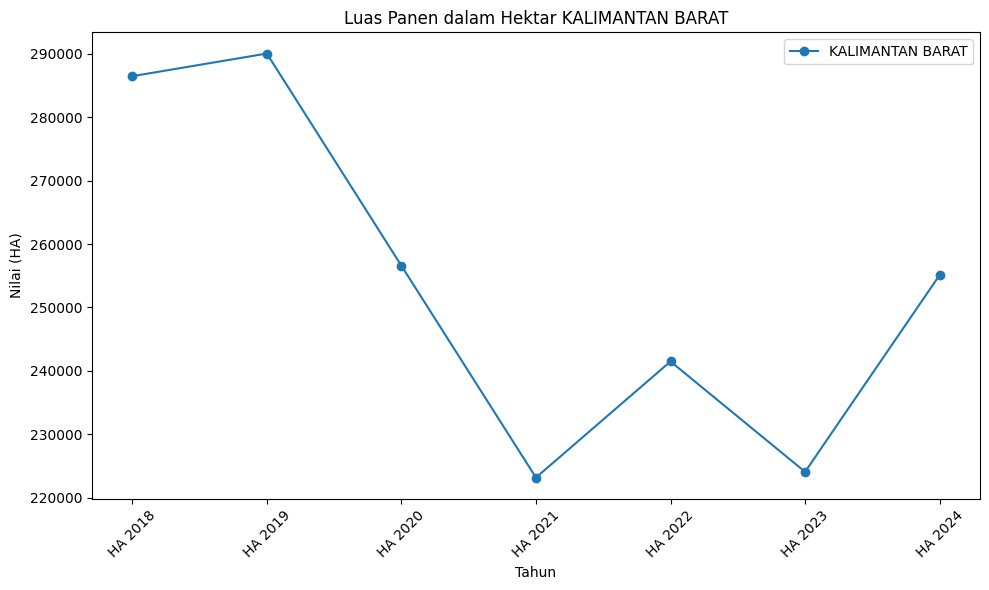

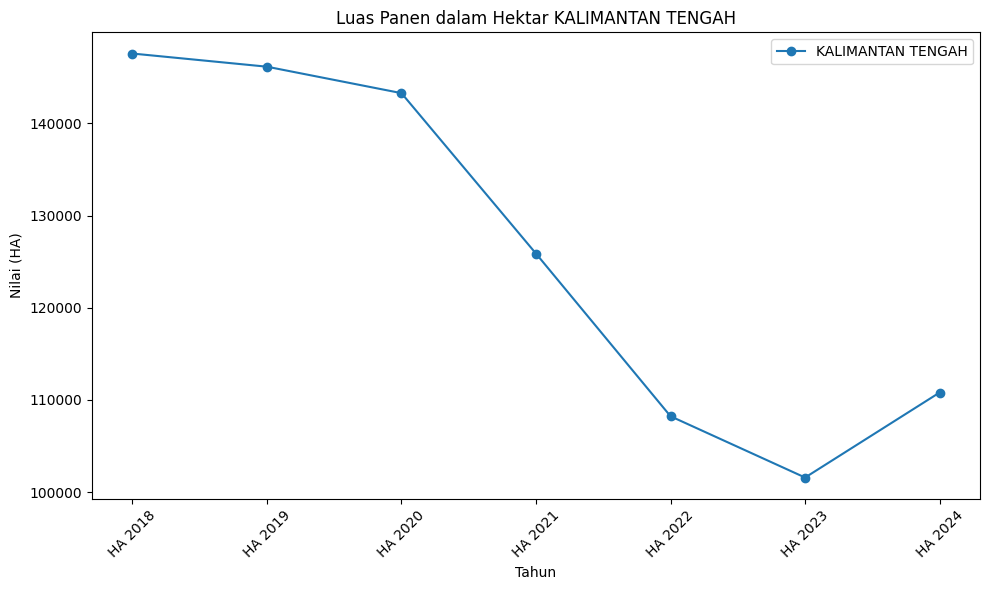

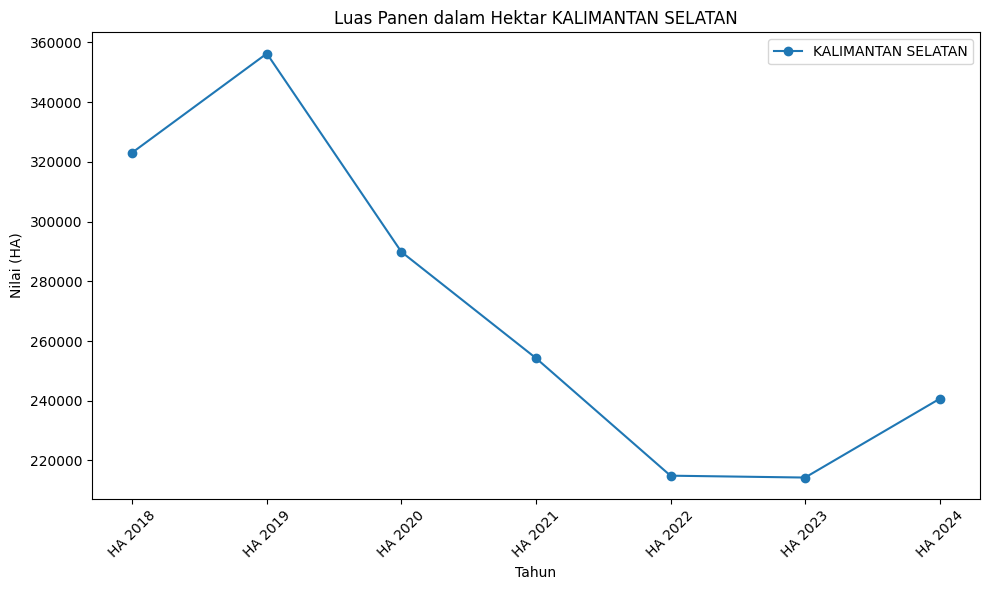

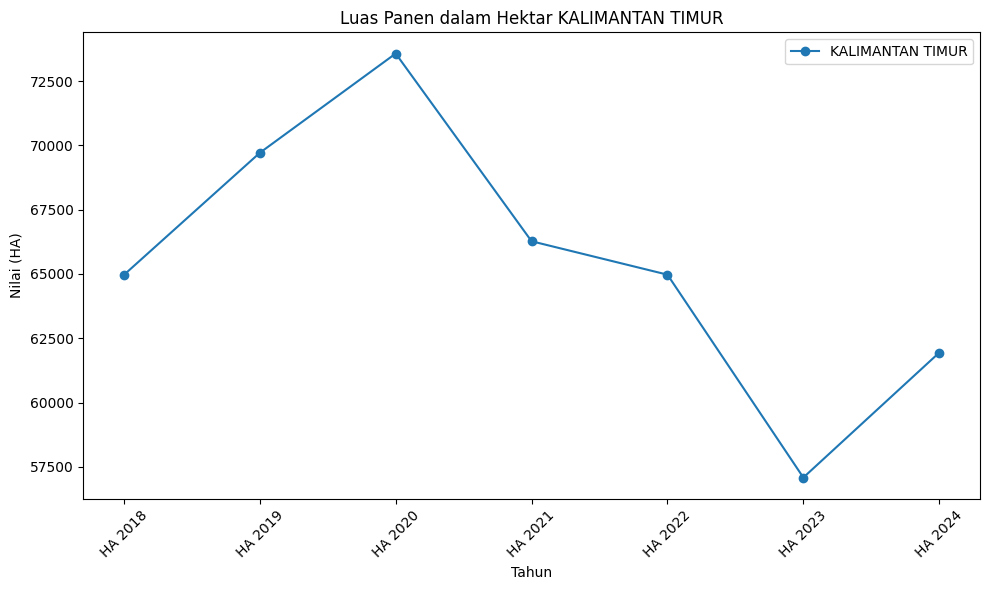

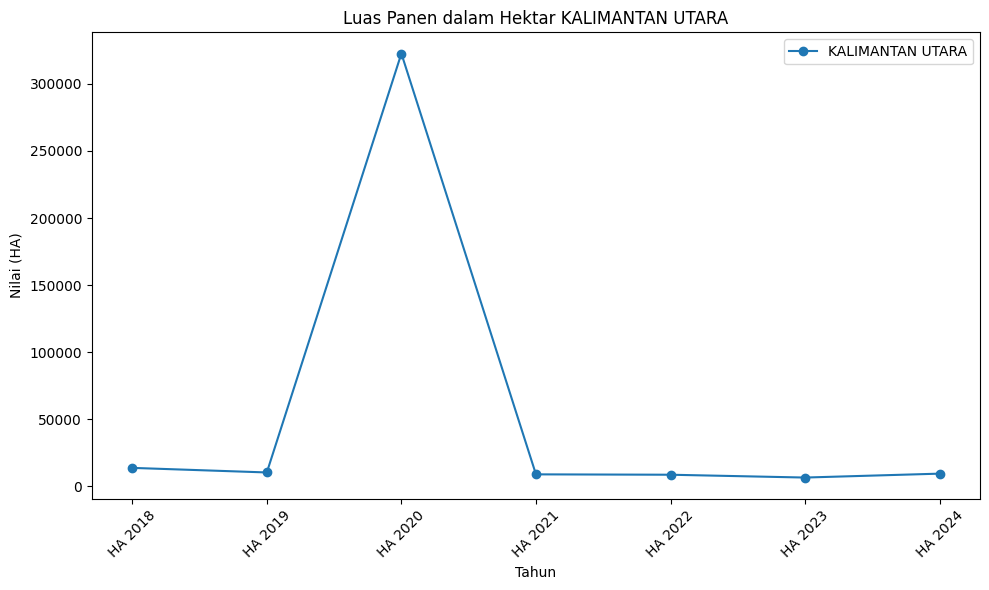

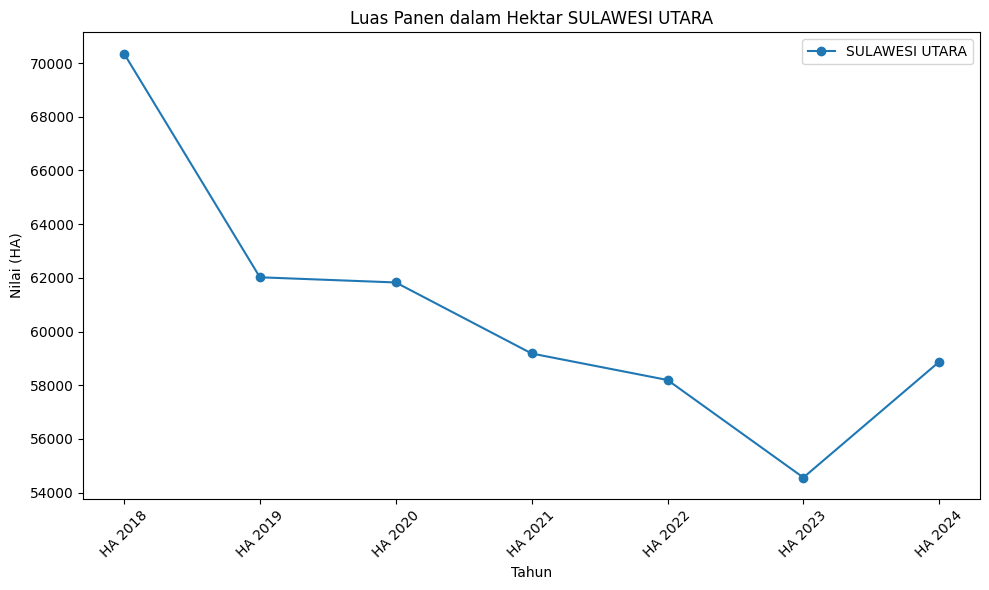

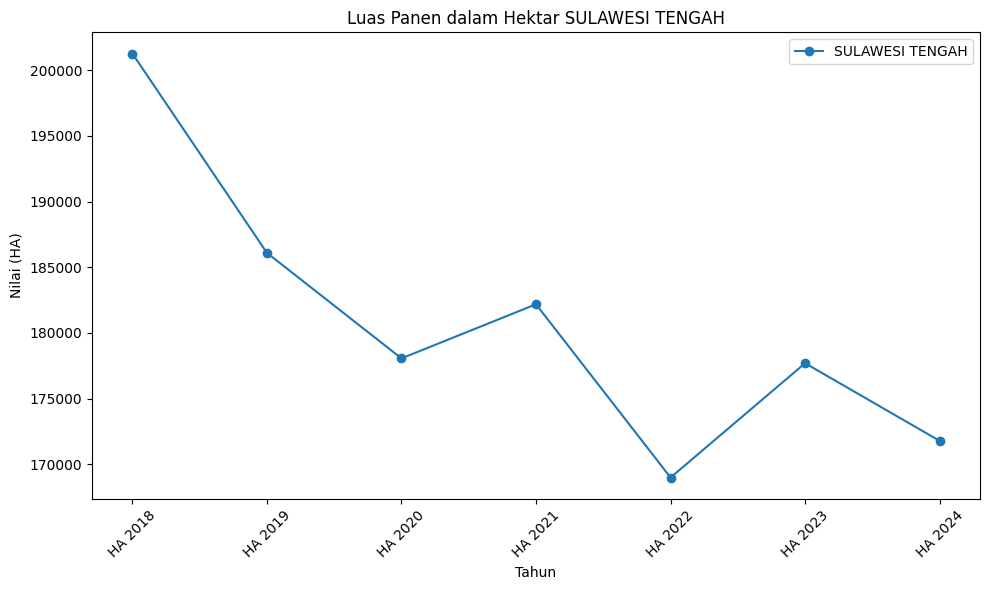

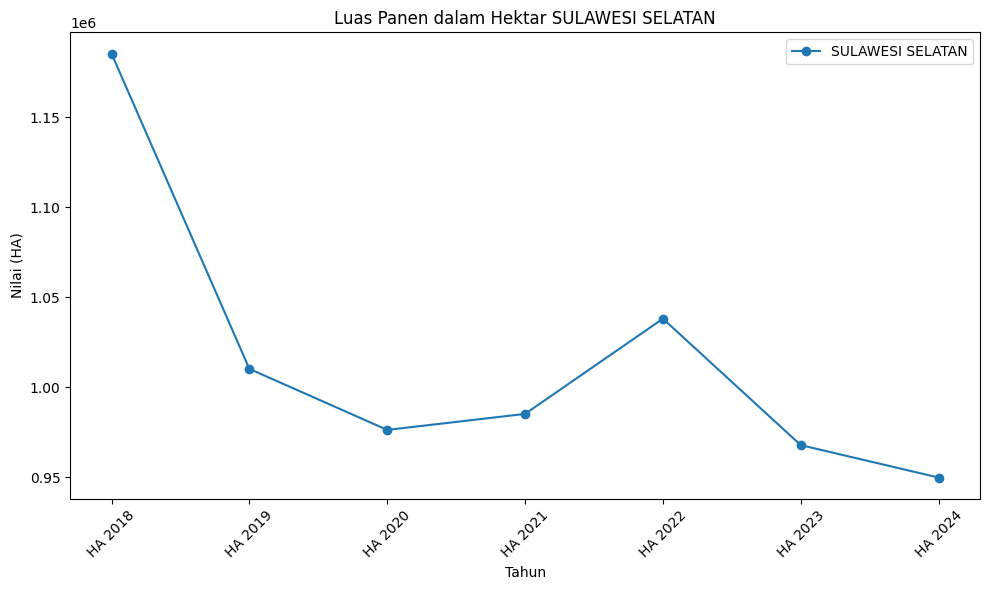

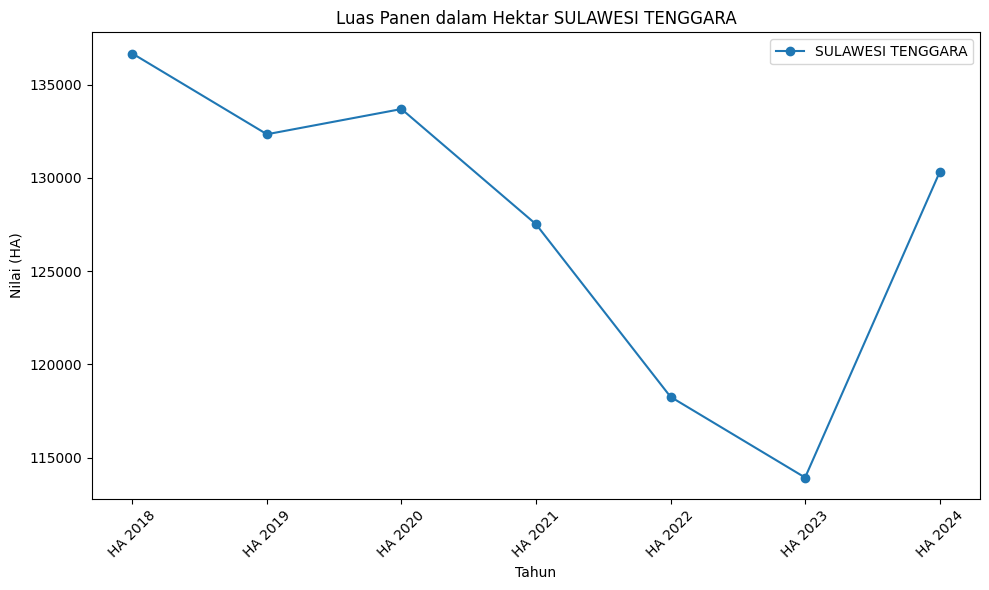

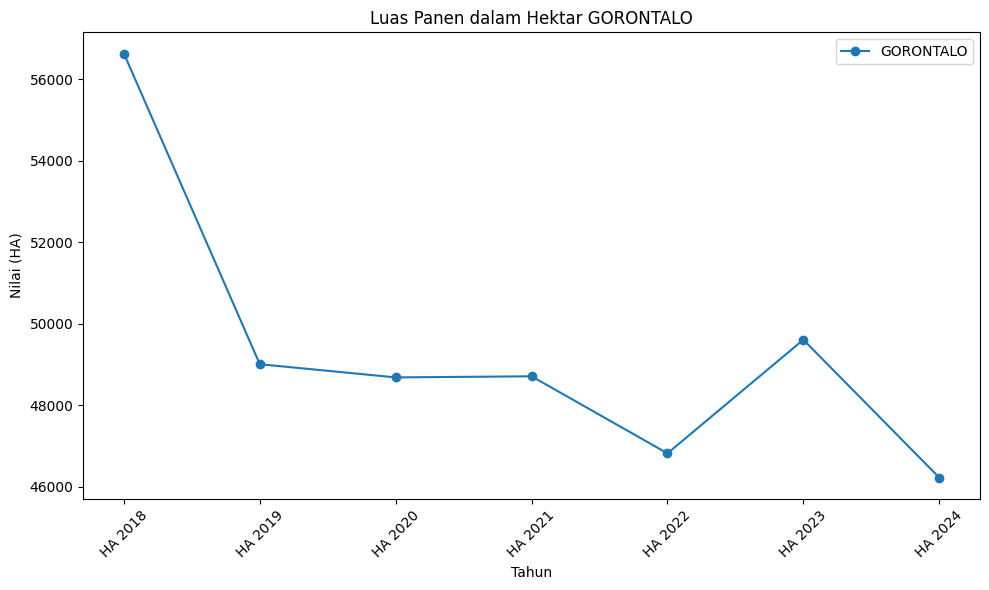

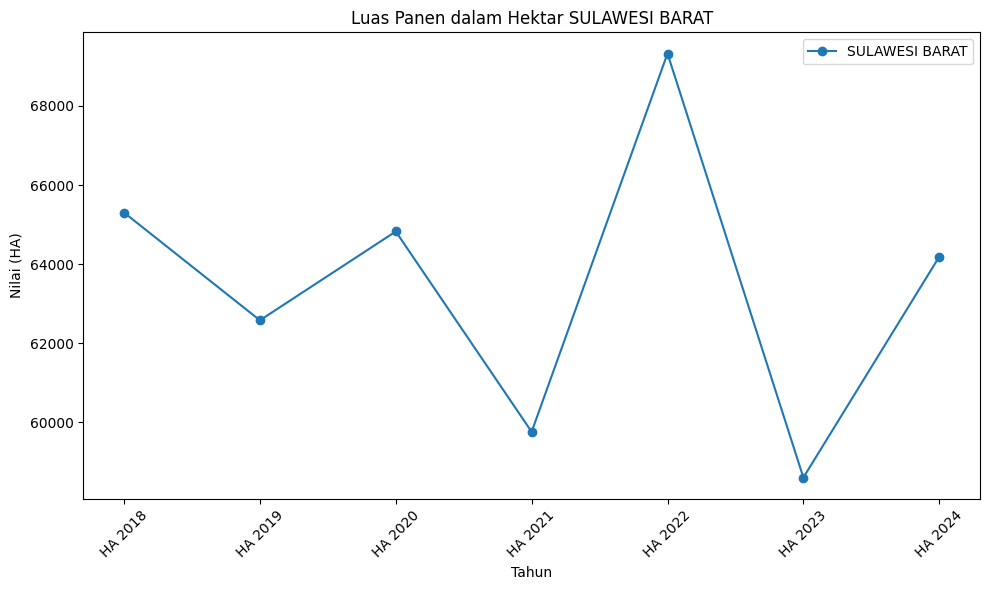

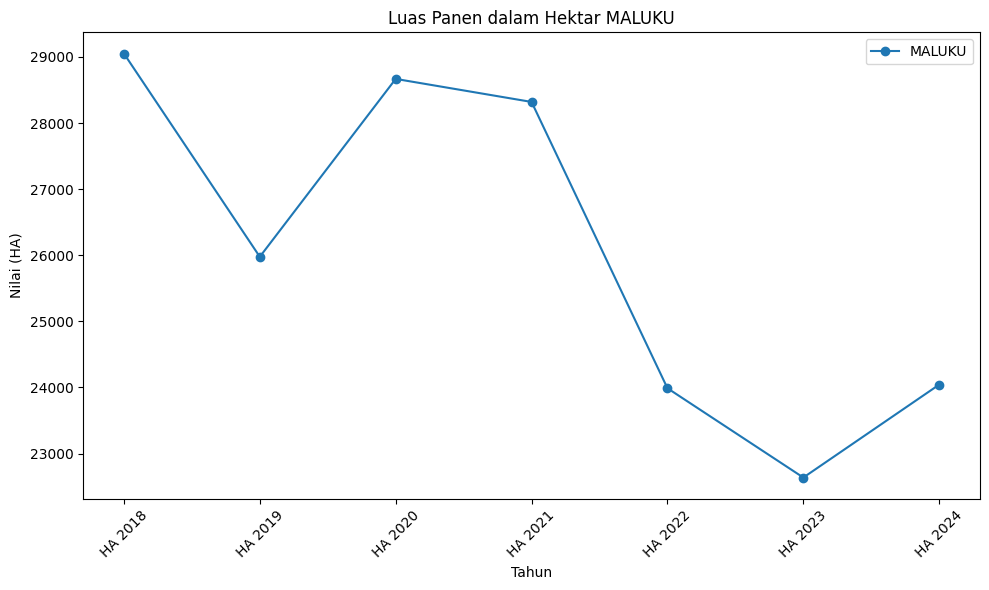

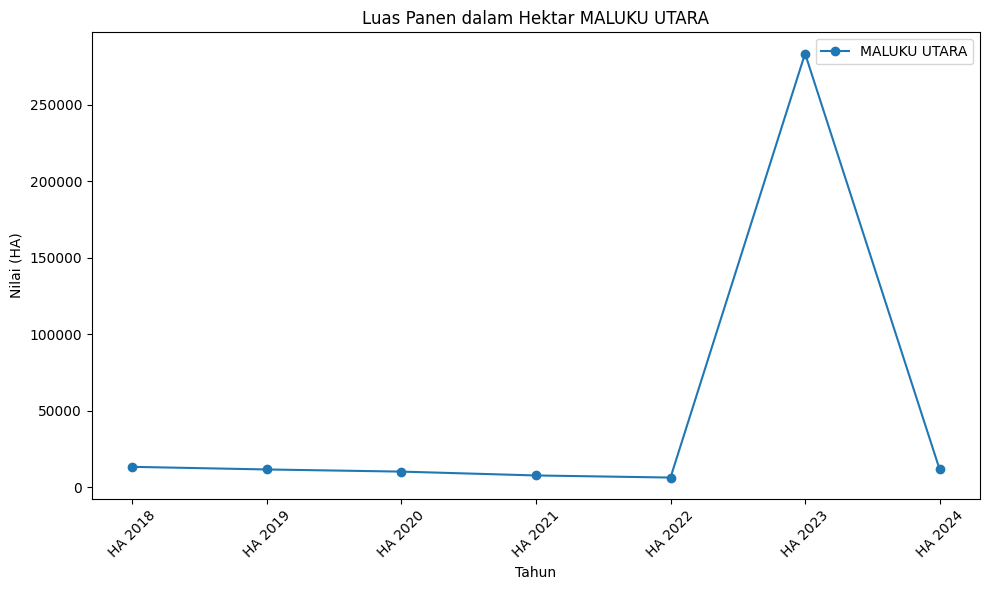

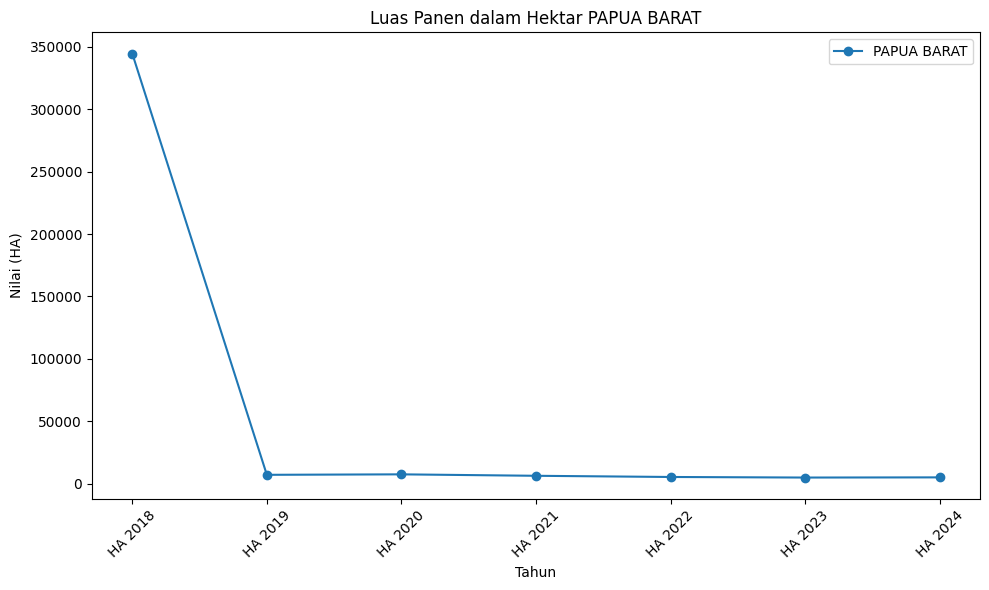

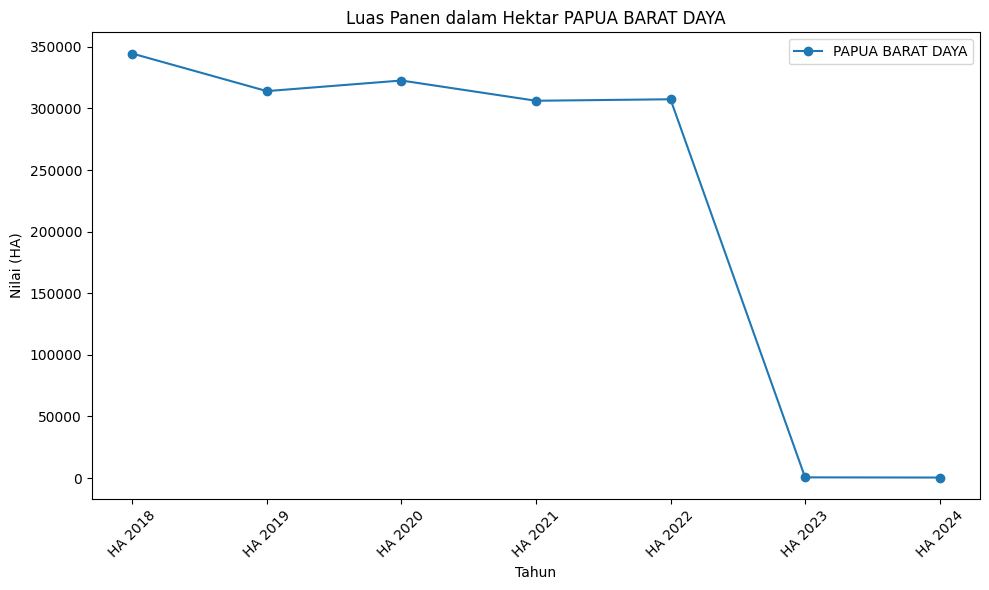

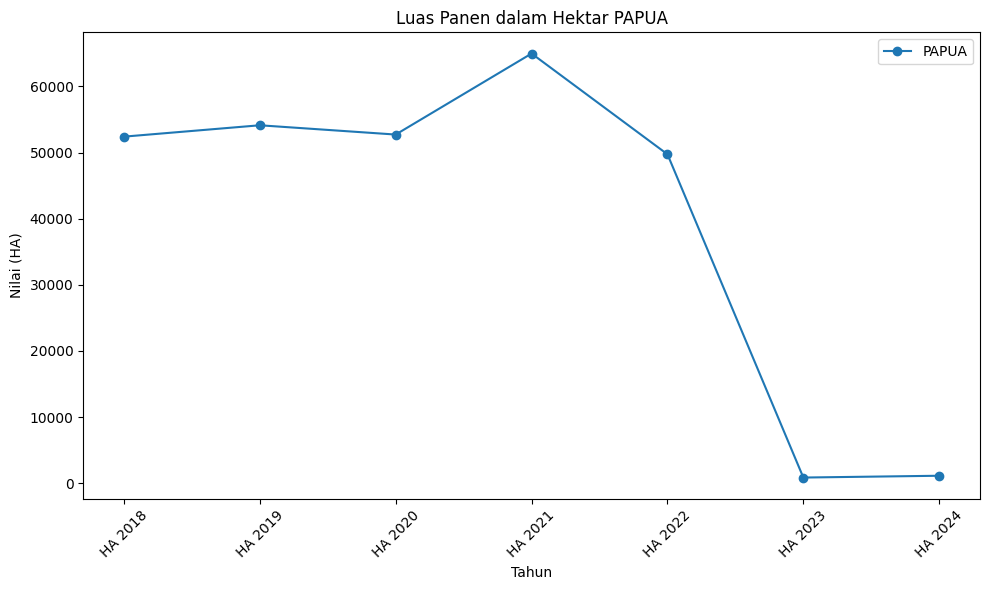

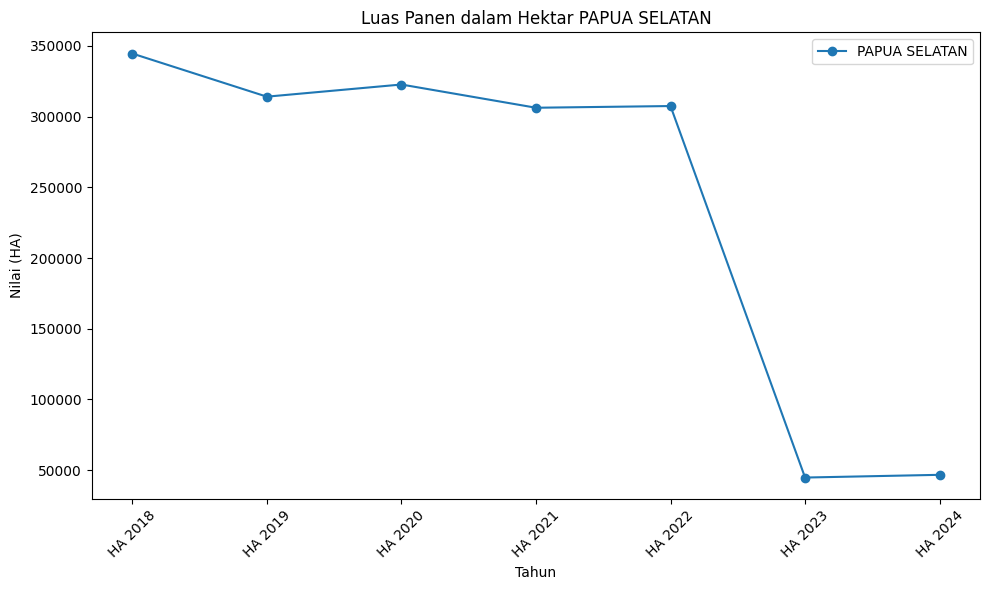

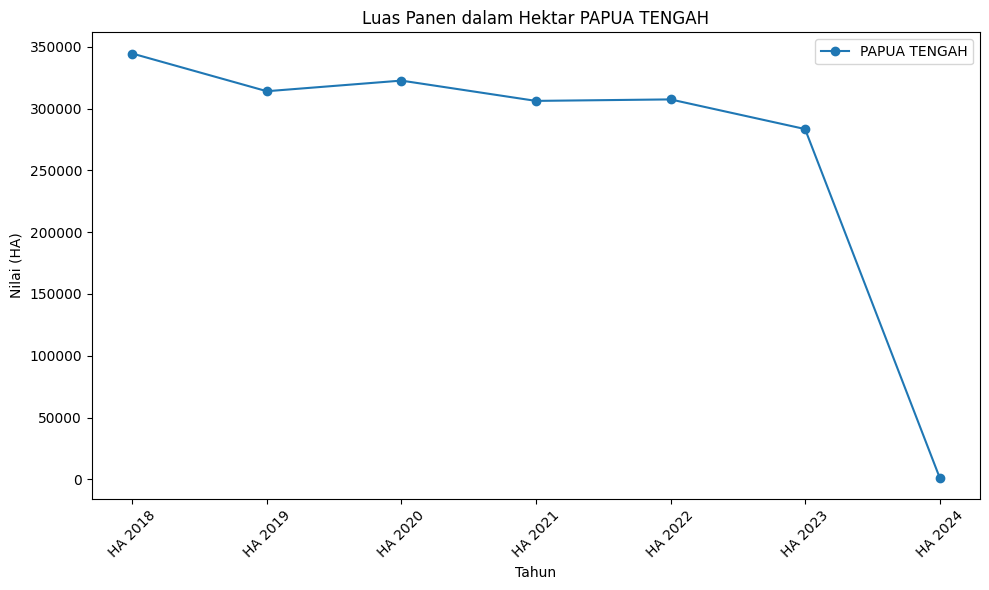

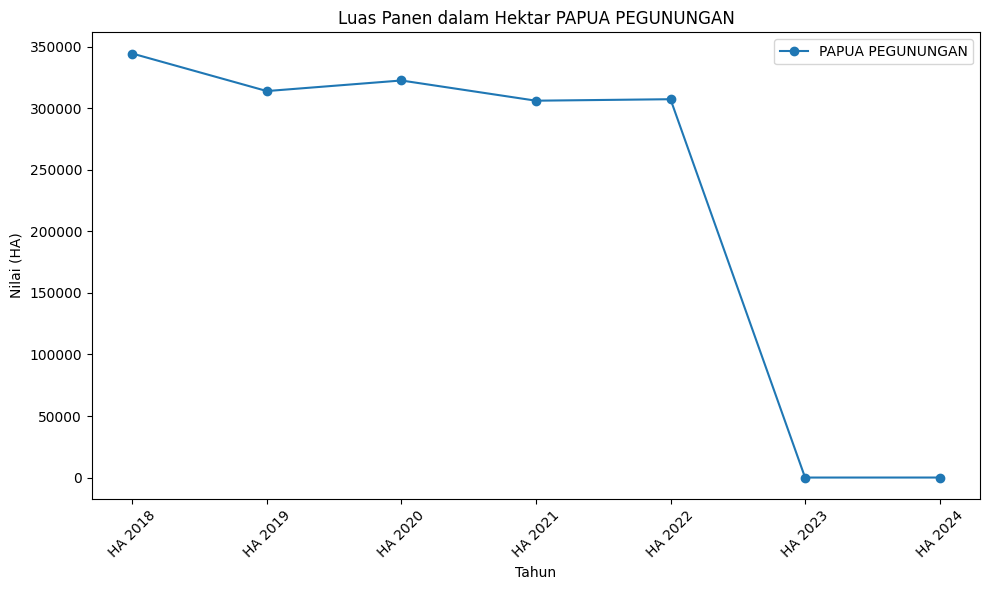

In [8]:


# Memfilter data dari tahun 2018 hingga 2024
columns_to_plot = ['HA 2018', 'HA 2019', 'HA 2020', 'HA 2021', 'HA 2022', 'HA 2023', 'HA 2024']

# Pastikan data digunakan jika data_filled tidak tersedia
data_to_plot = data[columns_to_plot]
provinsi = data['38 Provinsi']  # Kolom nama provinsi

# Membuat grafik untuk setiap provinsi
for index, row in data_to_plot.iterrows():
    plt.figure(figsize=(10, 6))
    plt.plot(columns_to_plot, row, marker='o', label=f"{provinsi[index]}")

    # Menambahkan detail pada grafik
    plt.title(f"Luas Panen dalam Hektar {provinsi[index]}")
    plt.xlabel("Tahun")
    plt.ylabel("Nilai (HA)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    # Menampilkan grafik
    plt.show()


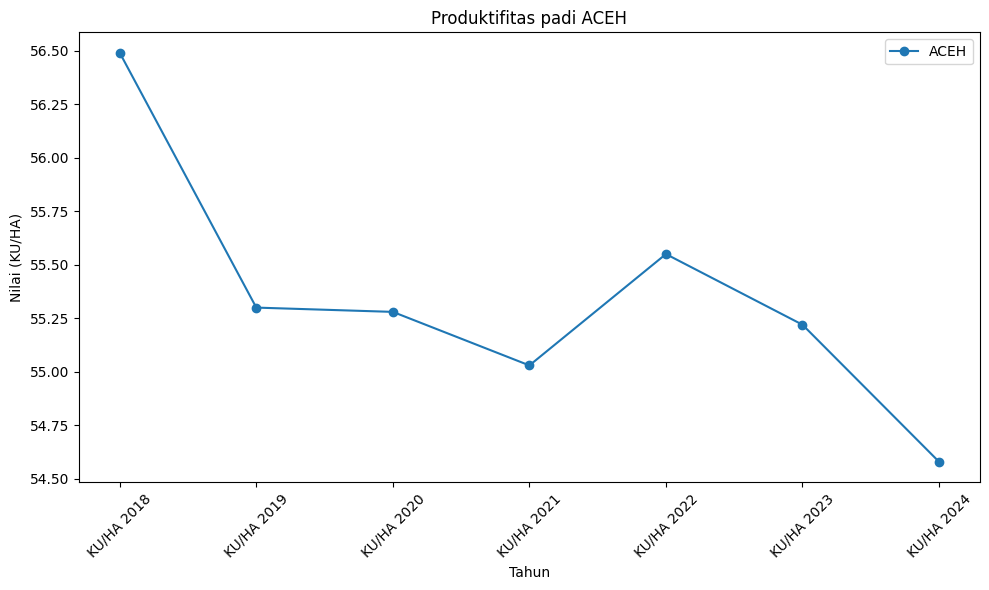

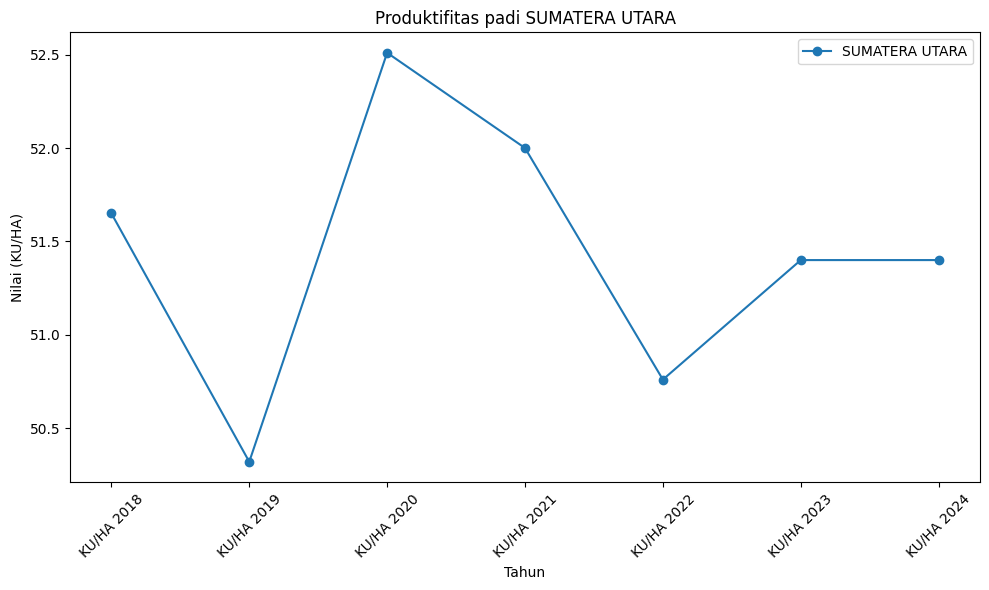

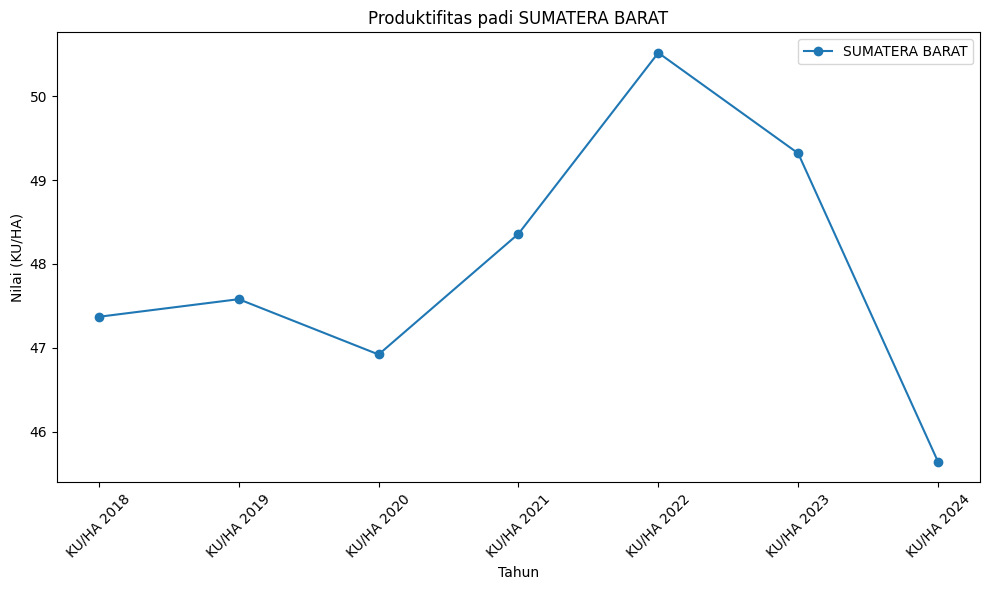

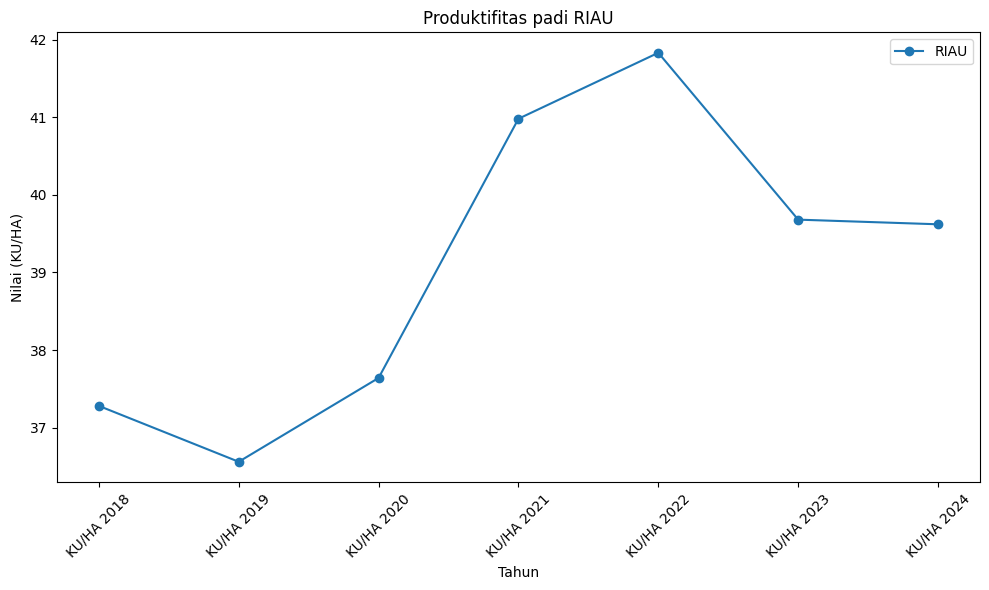

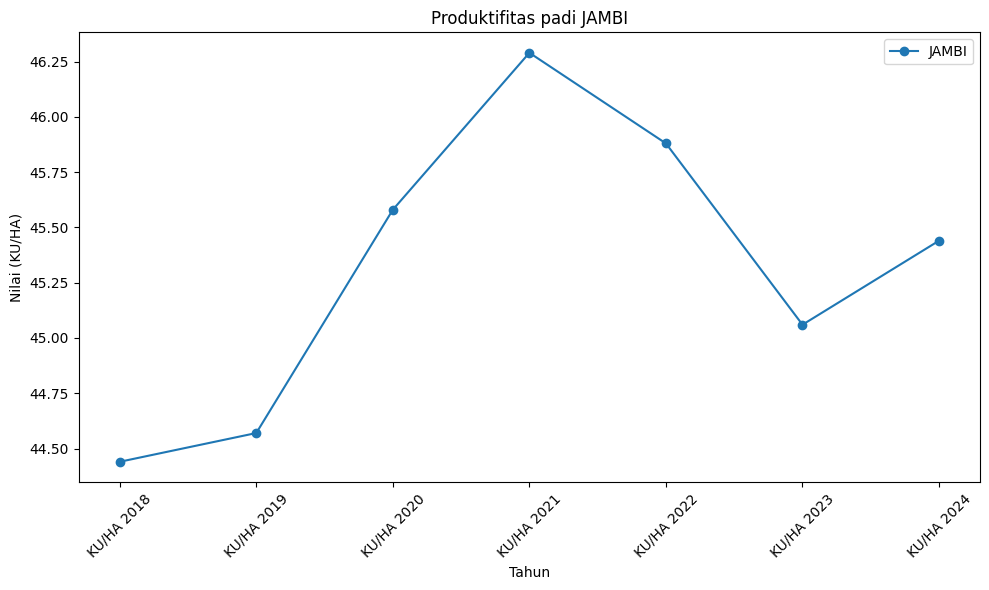

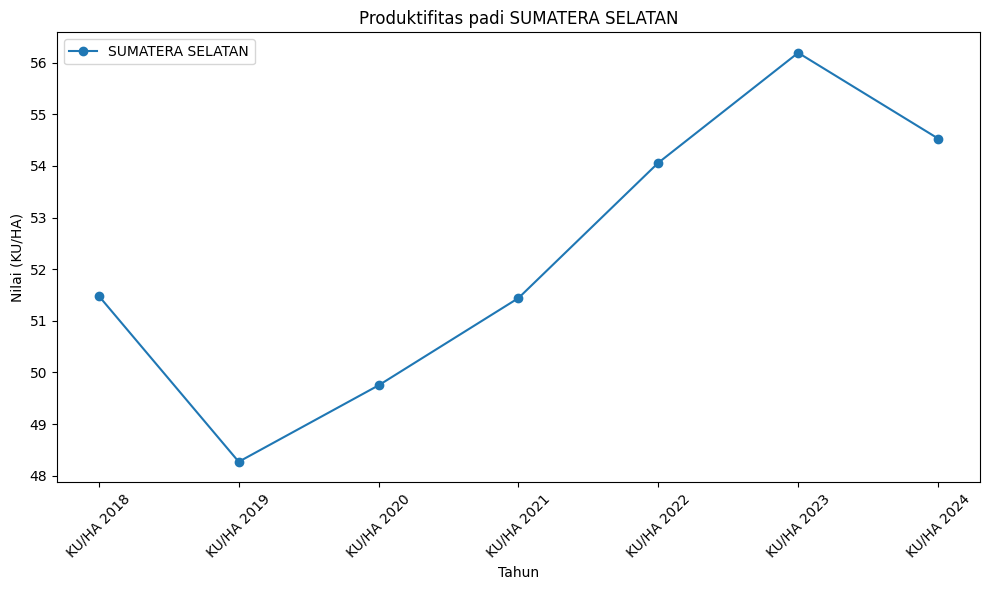

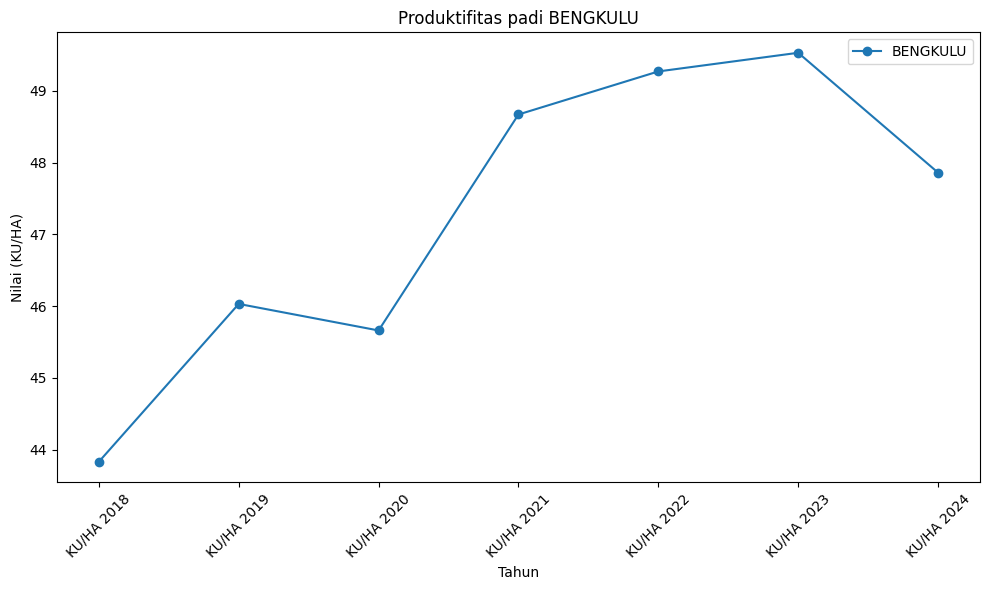

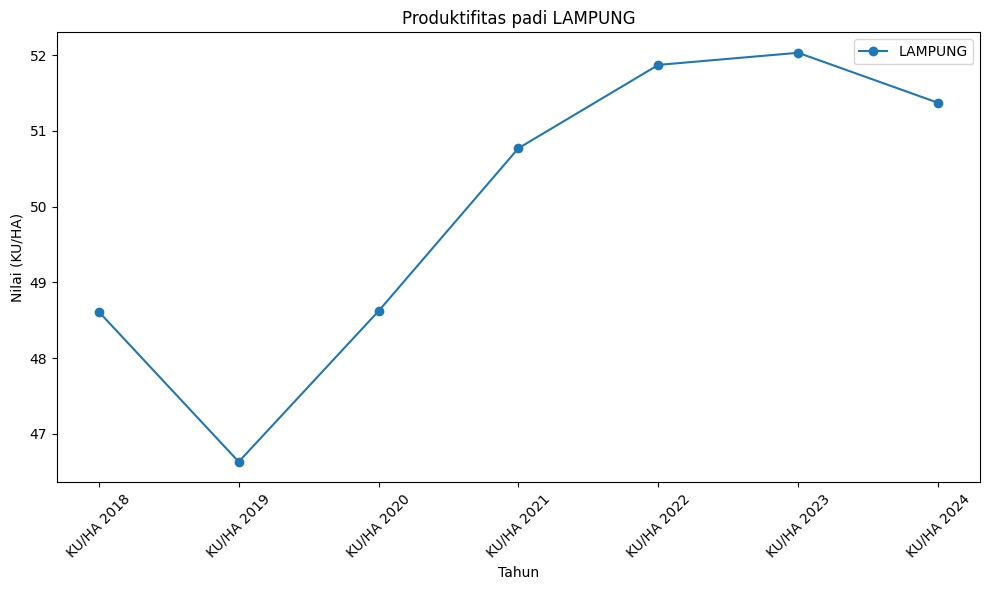

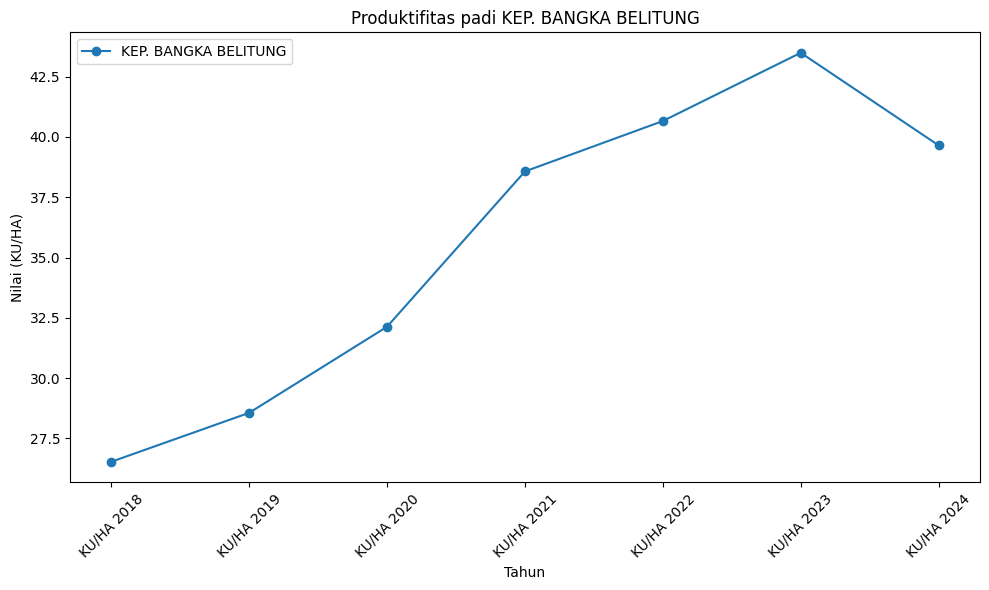

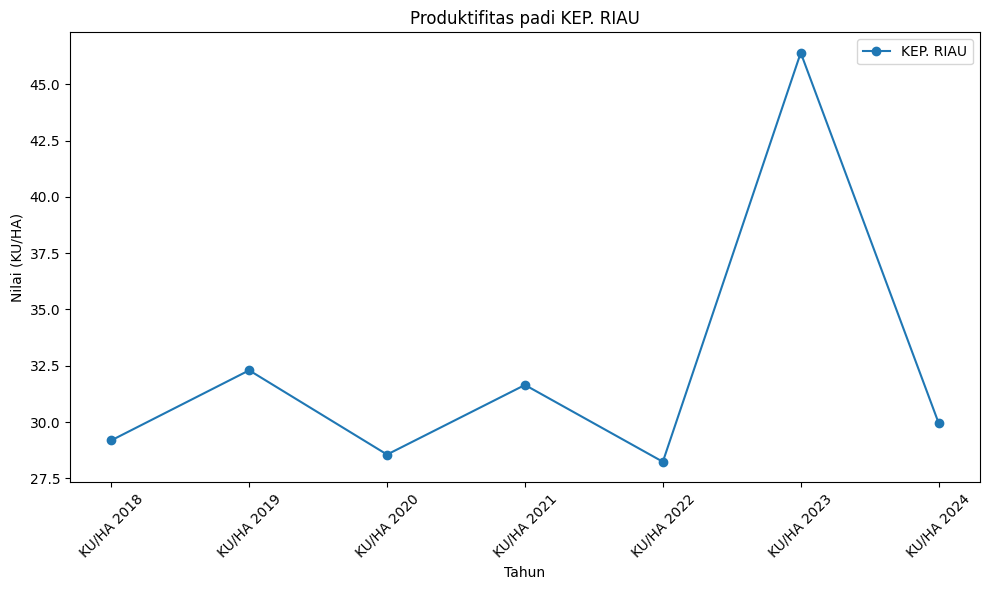

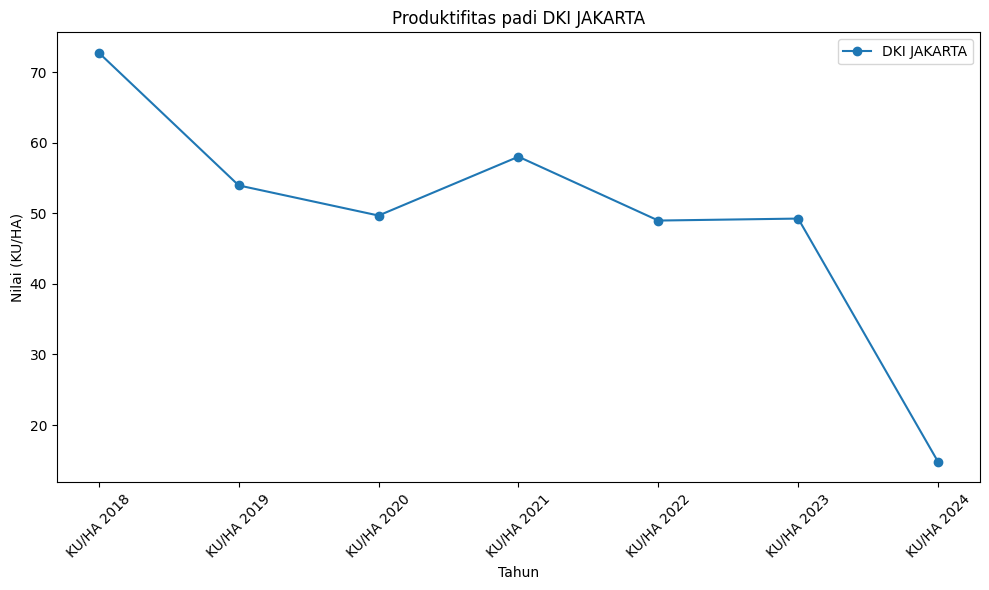

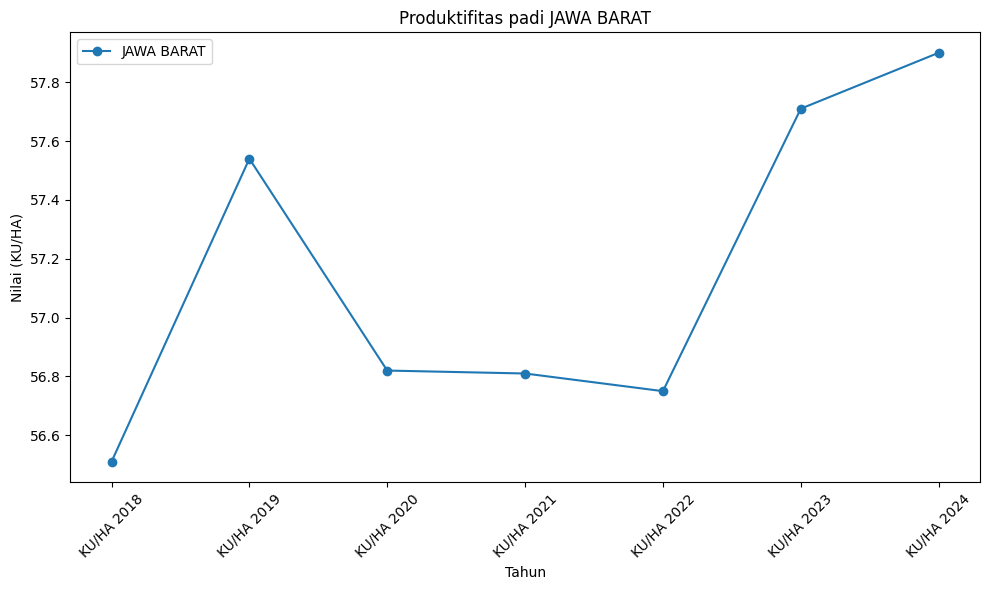

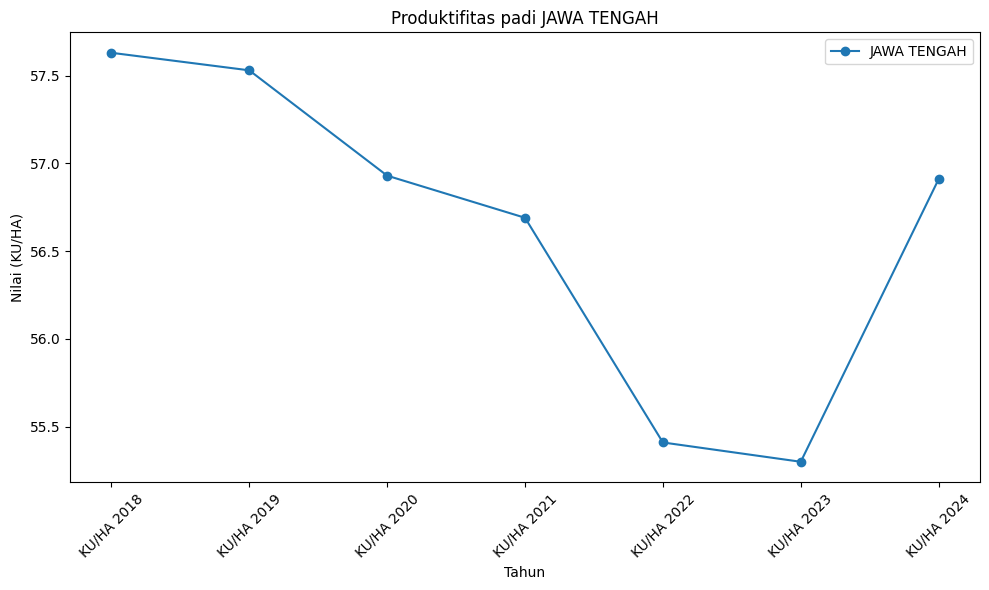

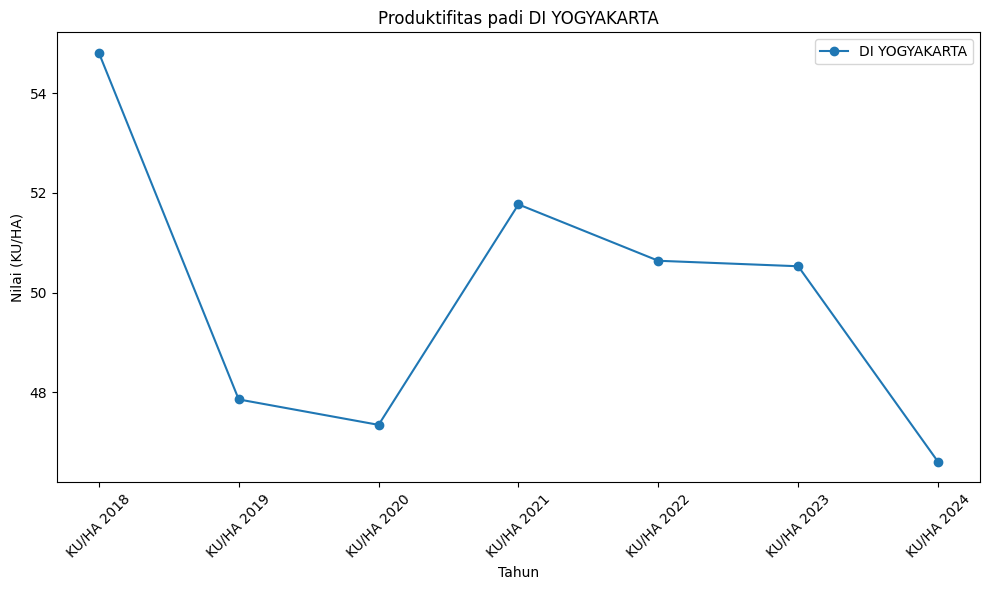

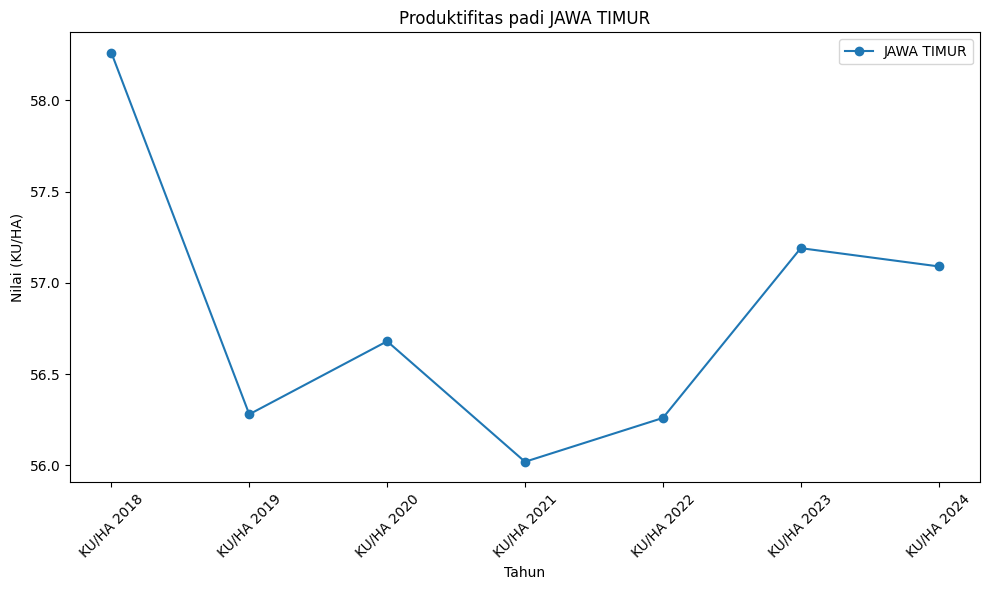

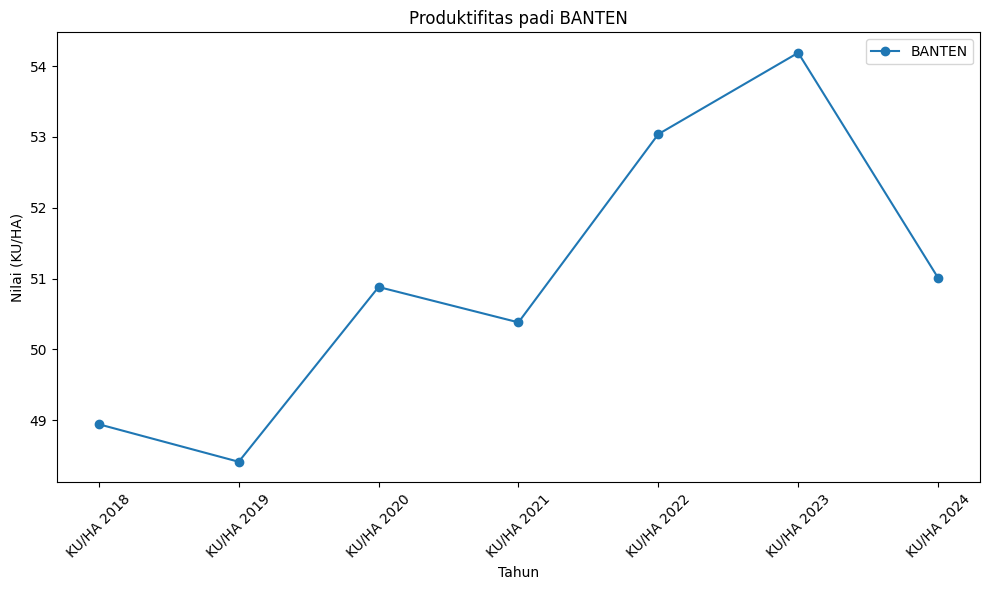

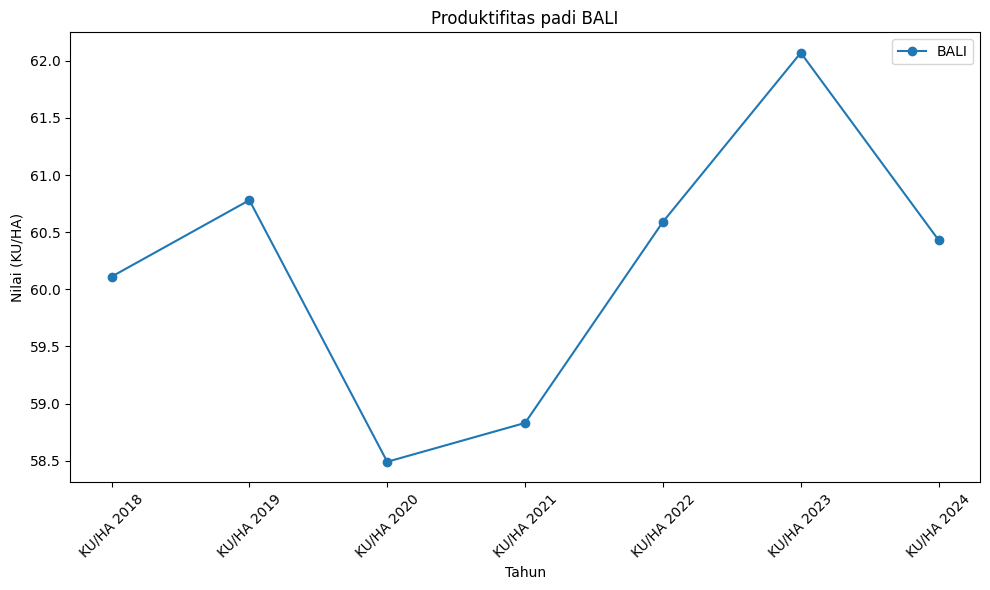

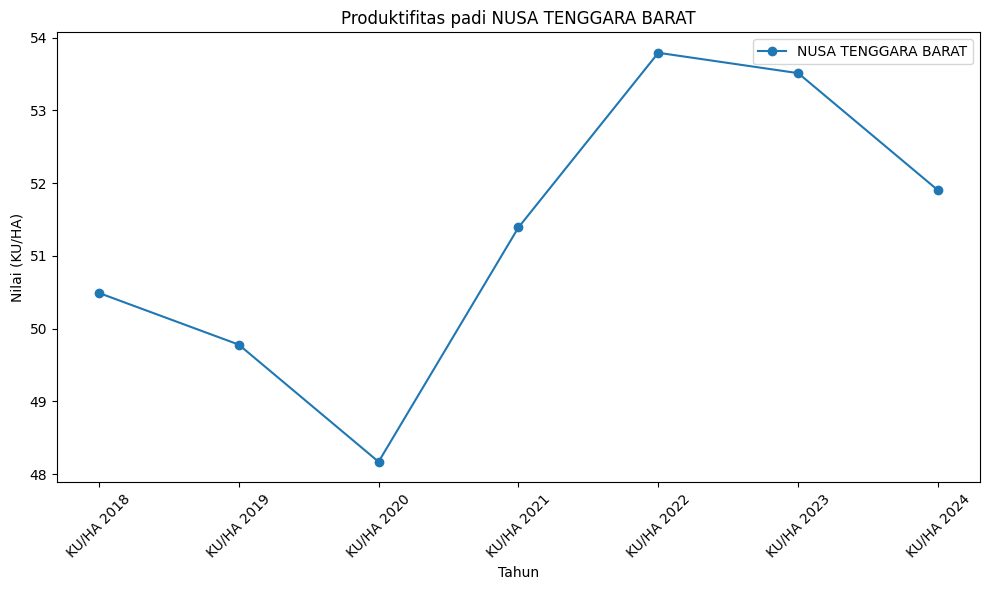

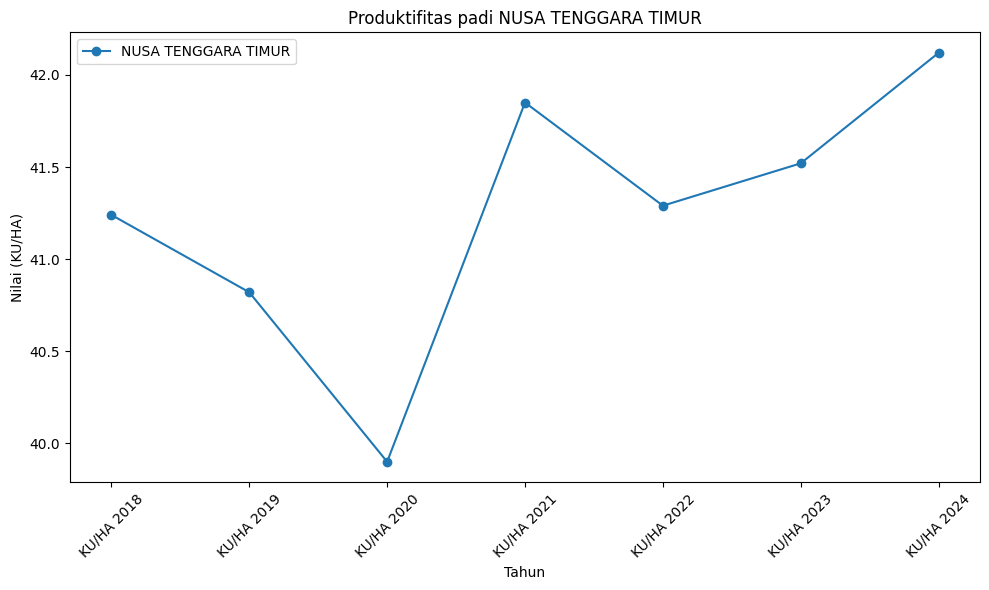

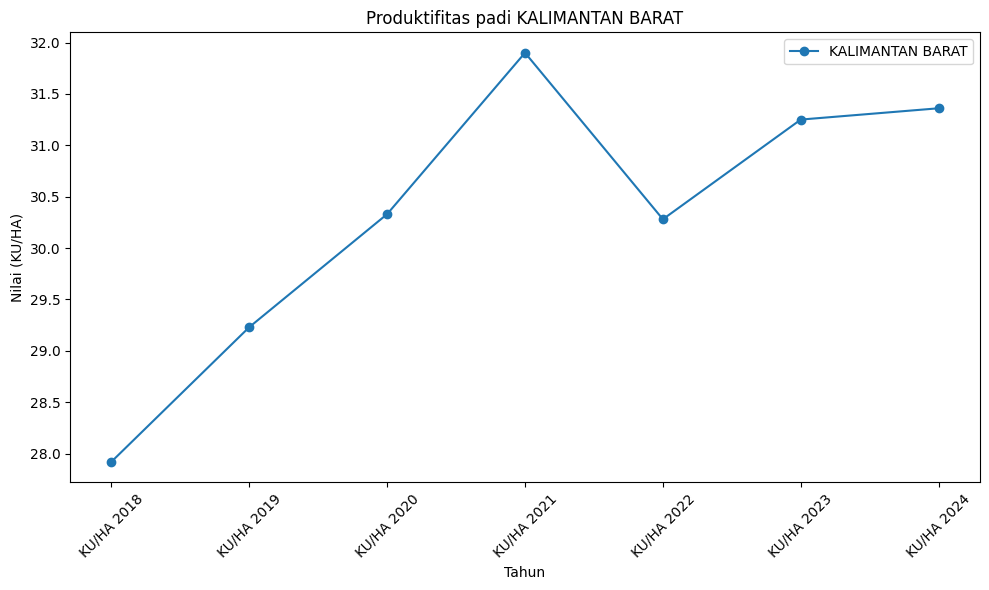

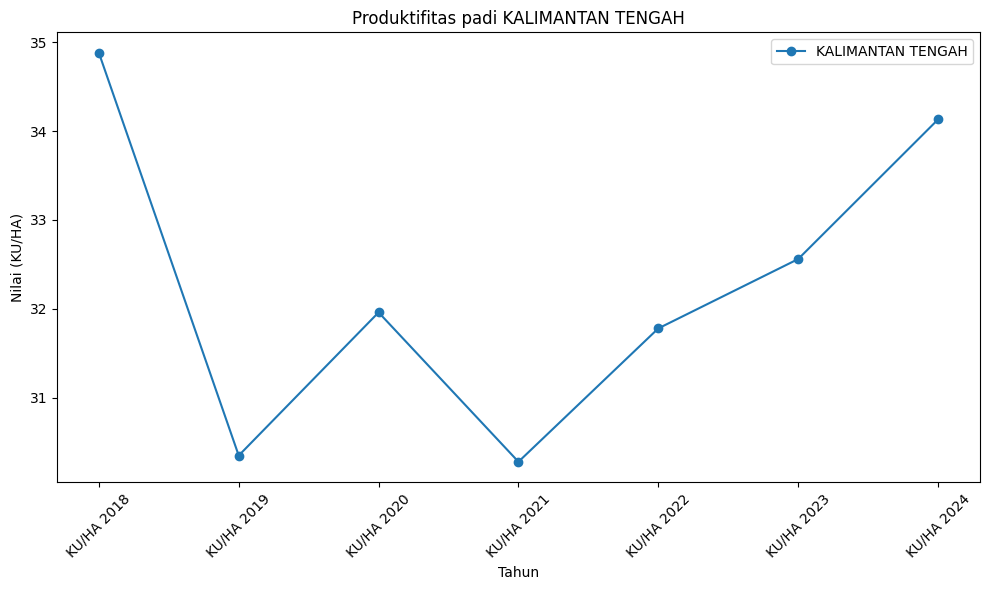

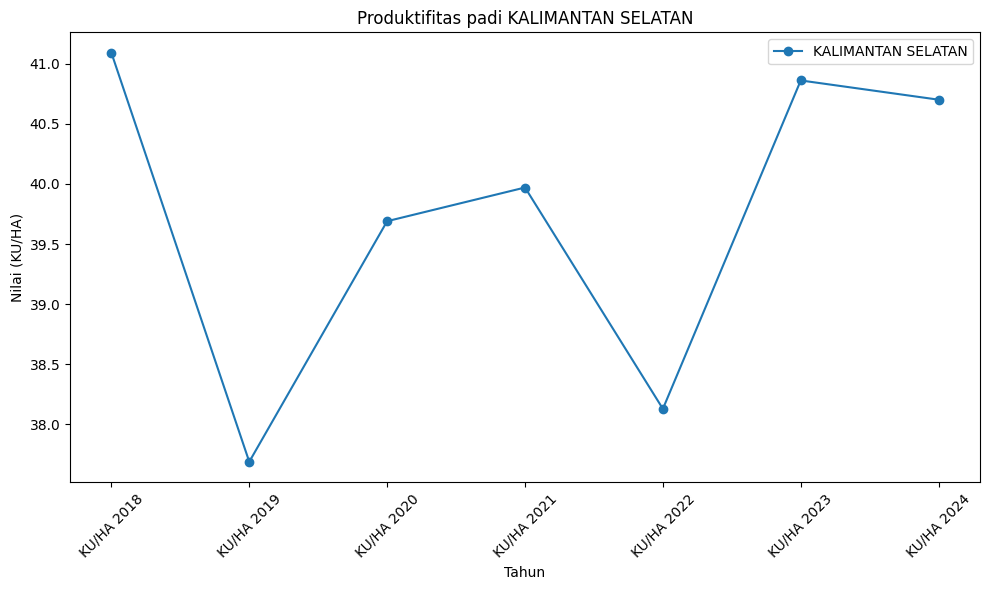

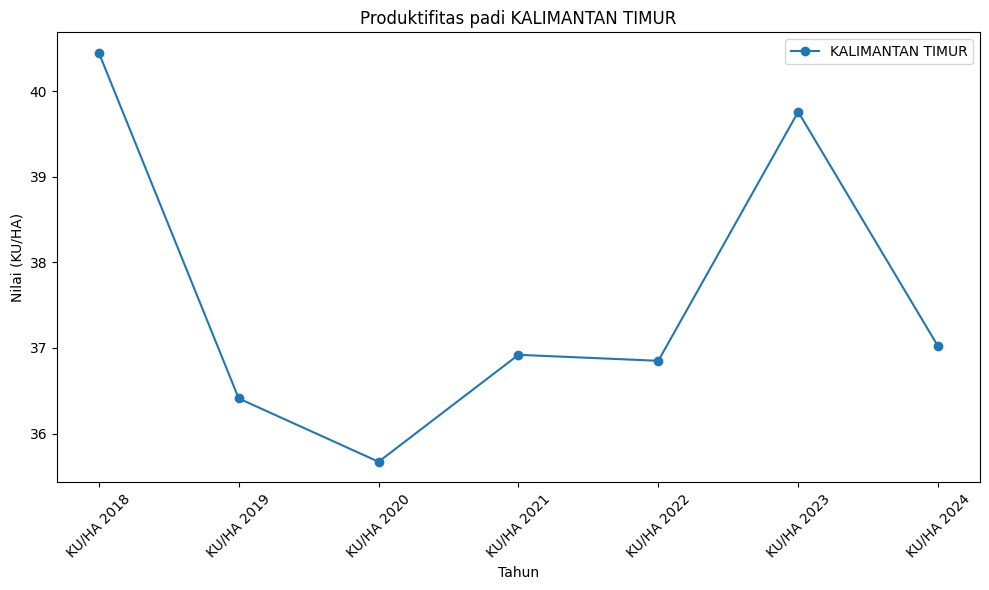

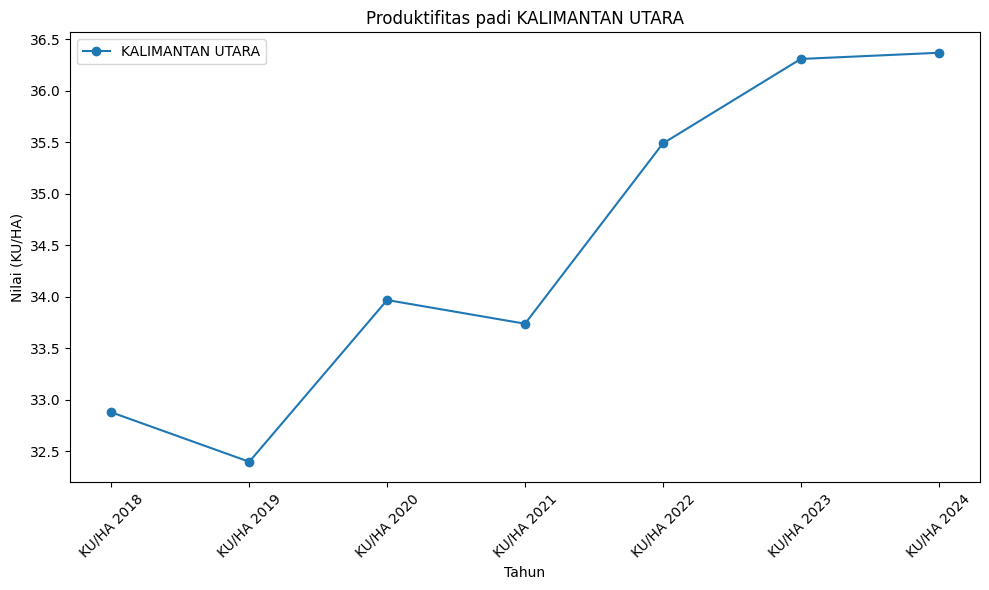

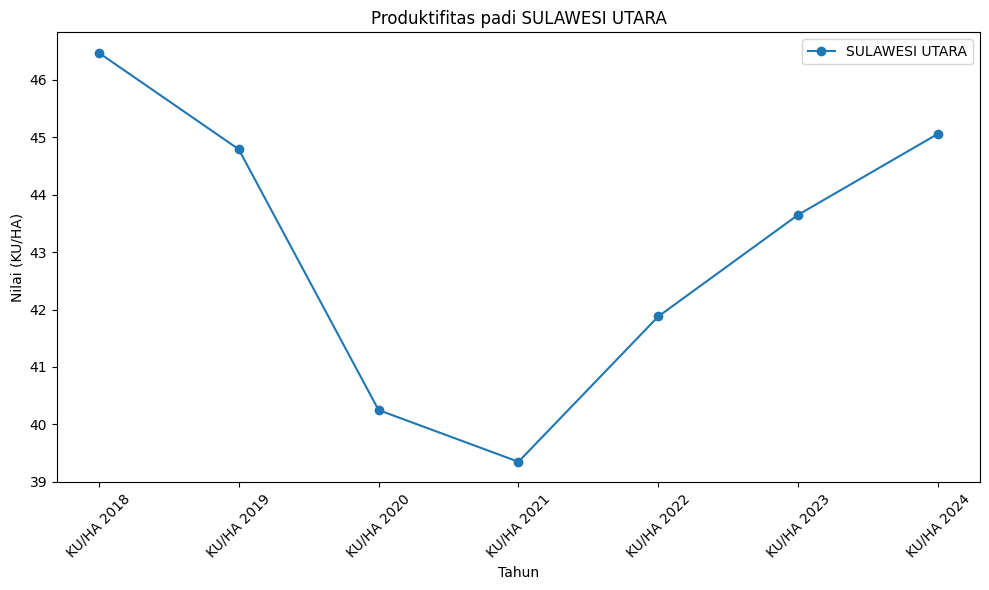

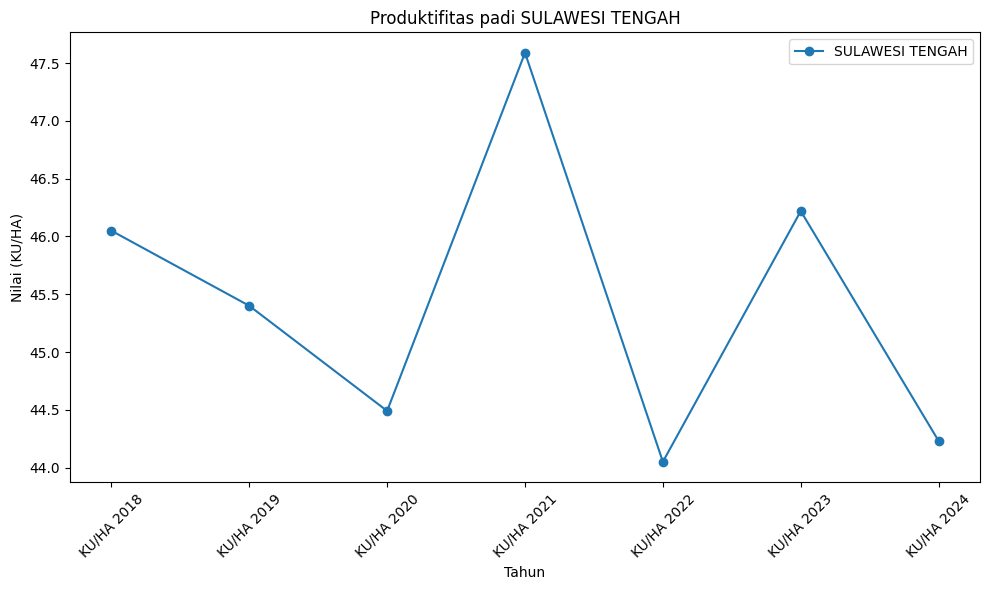

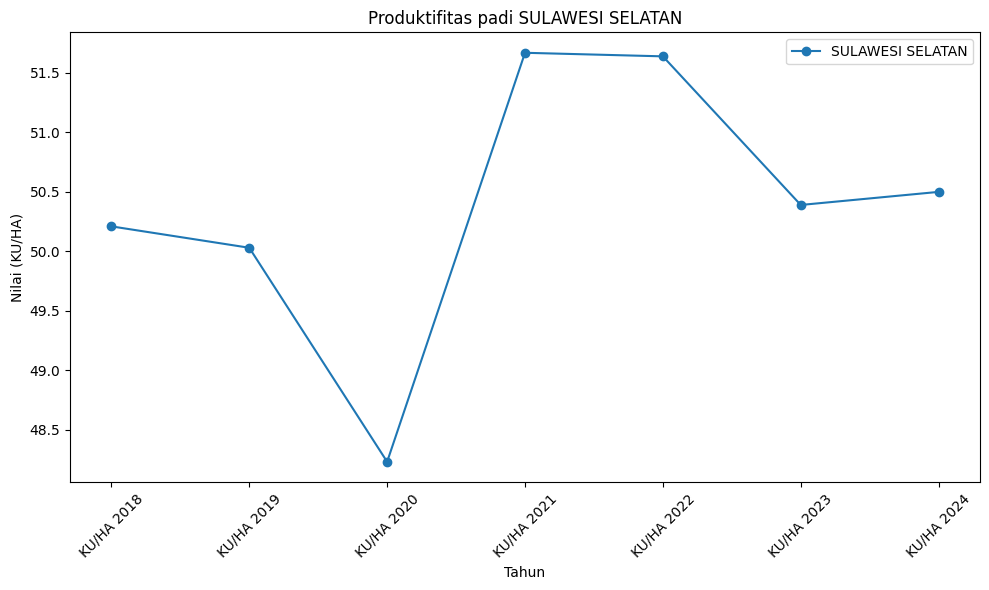

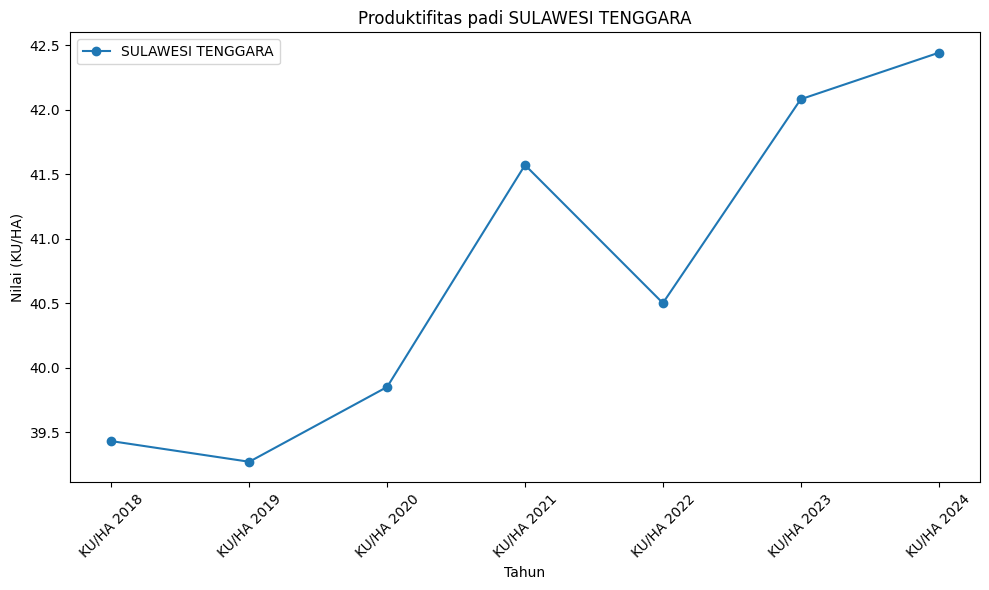

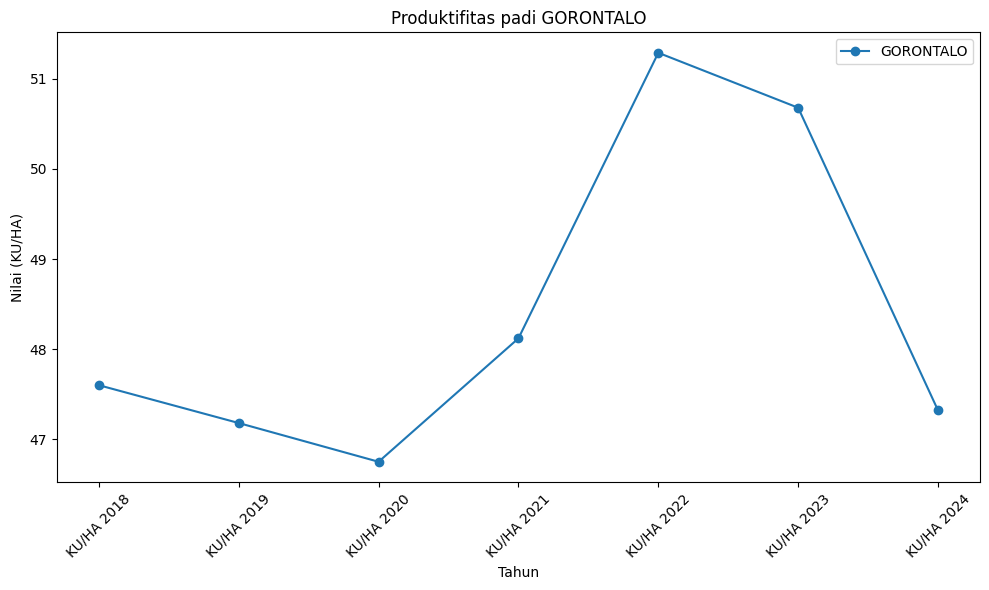

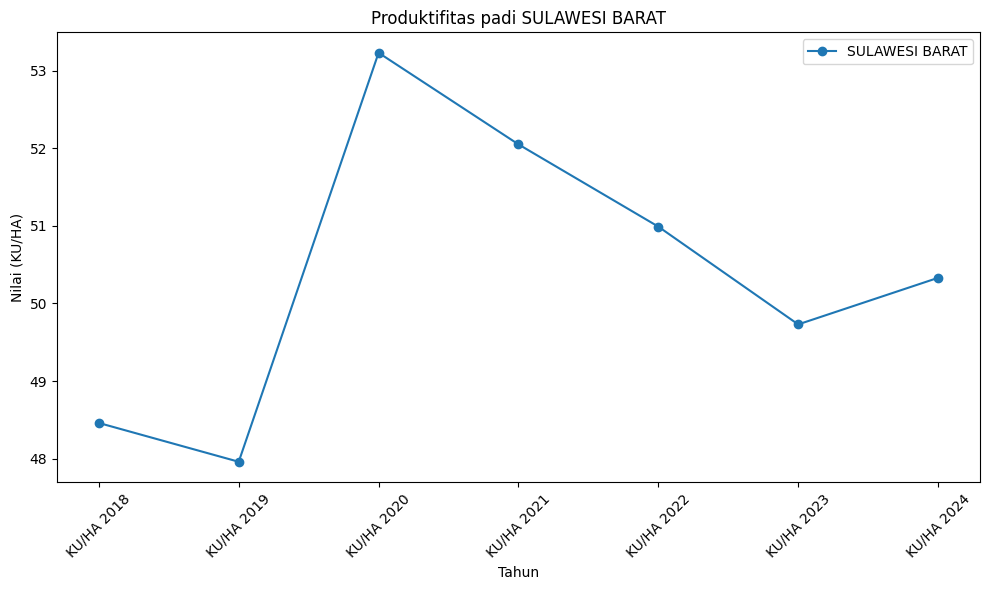

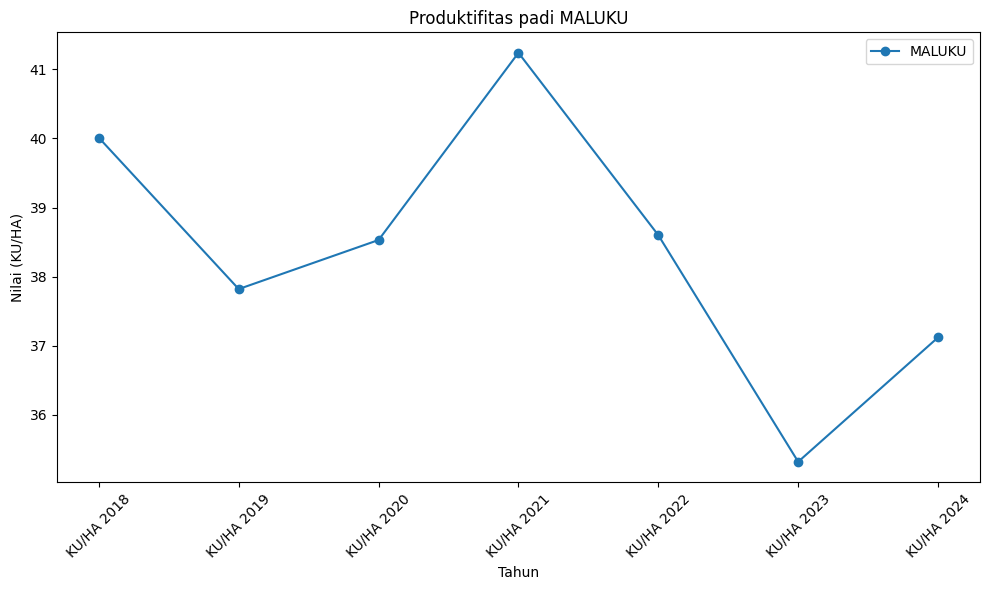

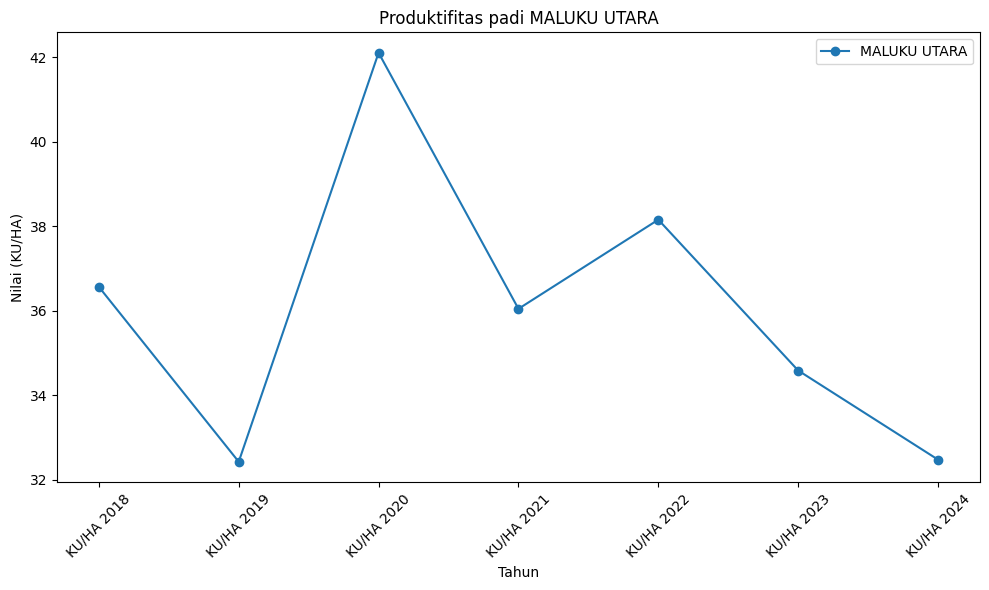

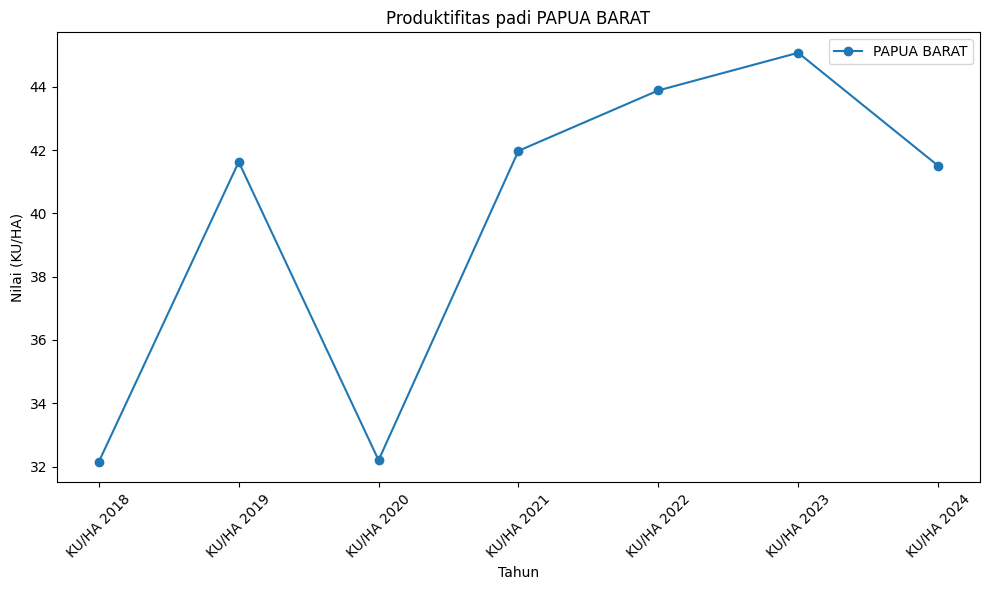

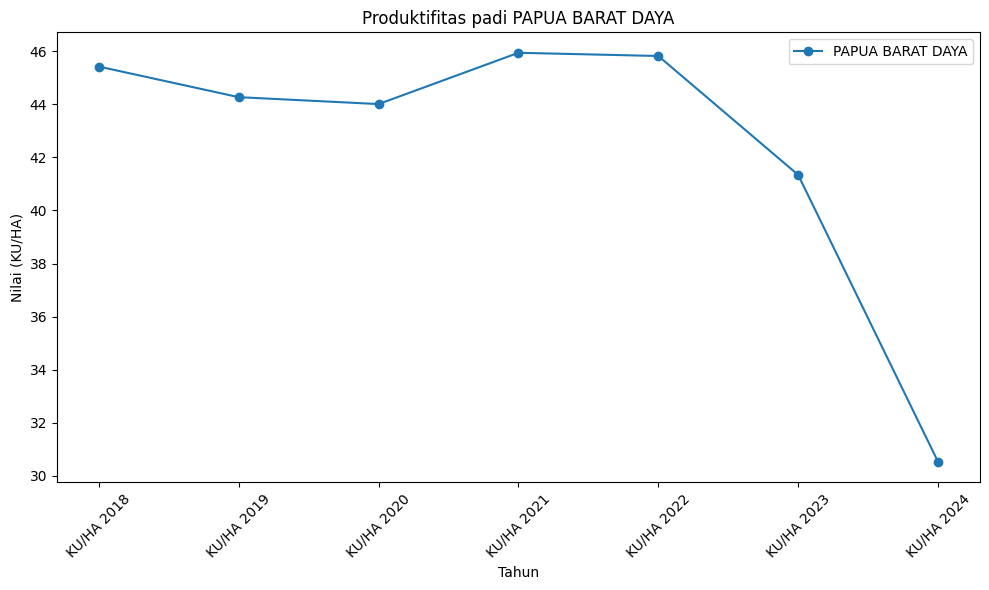

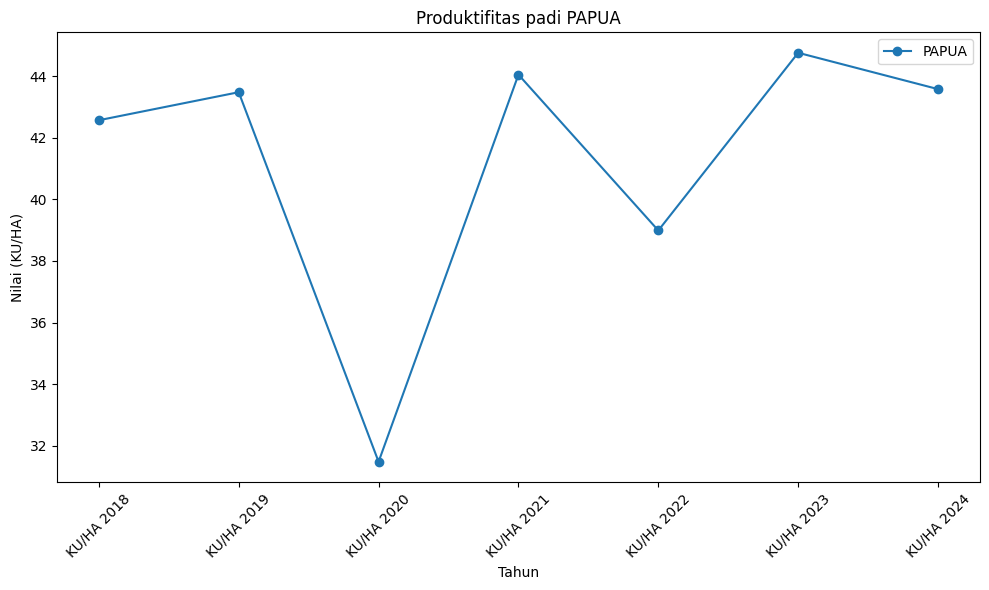

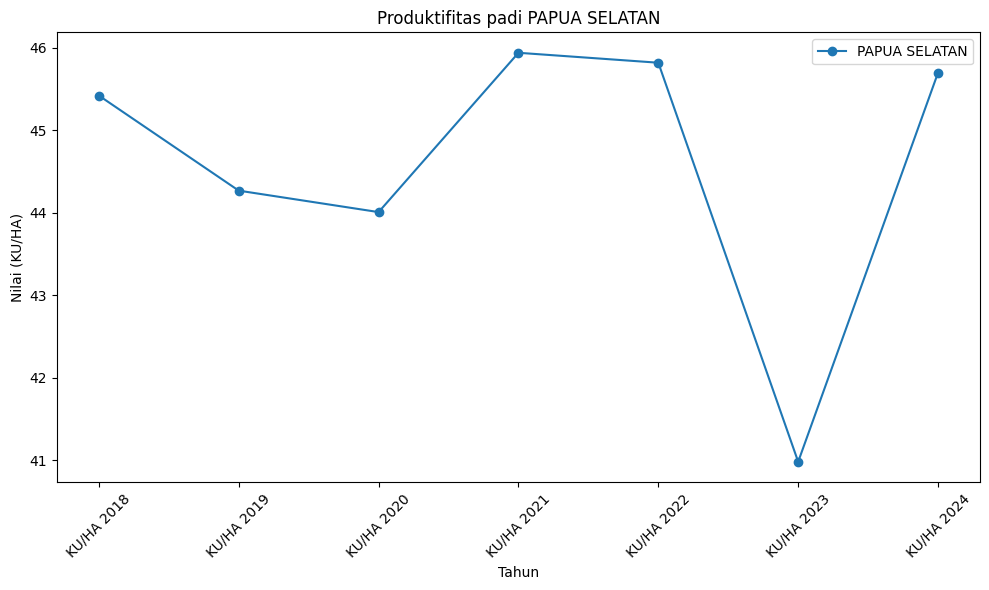

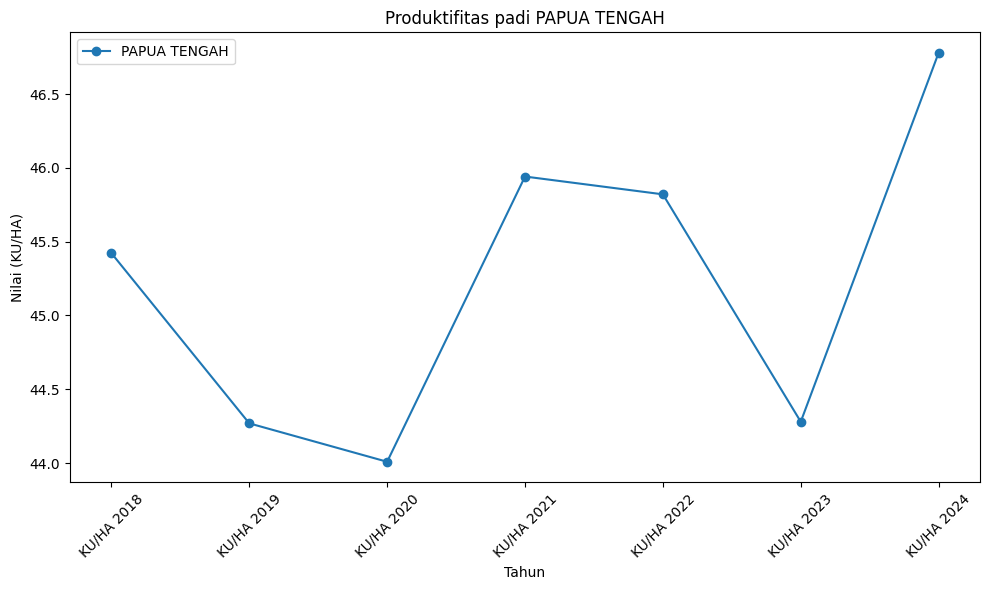

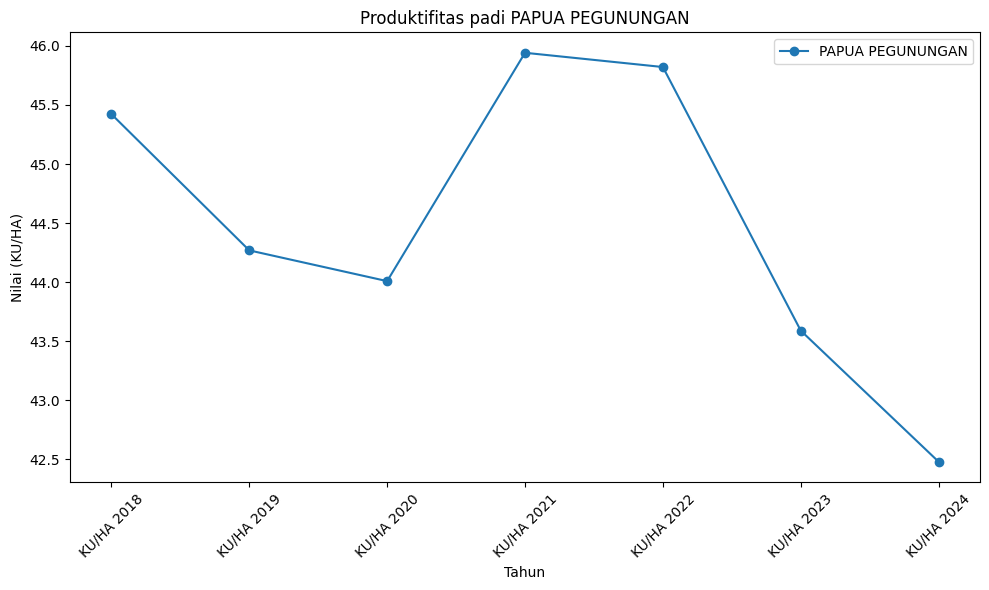

In [9]:


# Memfilter data dari tahun 2018 hingga 2024
columns_to_plot = ['KU/HA 2018', 'KU/HA 2019', 'KU/HA 2020', 'KU/HA 2021', 'KU/HA 2022', 'KU/HA 2023', 'KU/HA 2024']

# Pastikan data digunakan jika data_filled tidak tersedia
data_to_plot = data[columns_to_plot]
provinsi = data['38 Provinsi']  # Kolom nama provinsi

# Membuat grafik untuk setiap provinsi
for index, row in data_to_plot.iterrows():
    plt.figure(figsize=(10, 6))
    plt.plot(columns_to_plot, row, marker='o', label=f"{provinsi[index]}")

    # Menambahkan detail pada grafik
    plt.title(f"Produktifitas padi {provinsi[index]}")
    plt.xlabel("Tahun")
    plt.ylabel("Nilai (KU/HA)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    # Menampilkan grafik
    plt.show()


# **Normalisasi Data**

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi Data
def normalize_data(df, numeric_columns):
    scaler = MinMaxScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df, scaler  # Return scaler jika ingin digunakan lagi

In [13]:
print(data.head())

      38 Provinsi    HA 2018    HA 2019    HA 2020    HA 2021    HA 2022  \
0            ACEH  329515.78  310012.46  317869.41  297058.38  271750.20   
1  SUMATERA UTARA  408176.45  413141.24  388591.22  385405.00  411462.10   
2  SUMATERA BARAT  313050.82  311671.23  295664.47  272391.95  271883.10   
3            RIAU   71448.08   63142.04   64733.13   53062.35   51054.04   
4           JAMBI   86202.68   69536.06   84772.93   64412.26   60539.59   

     HA 2023    HA 2024  KU/HA 2018  KU/HA 2019  ...  KU/HA 2022  KU/HA 2023  \
0  254287.38  301081.97       56.49       55.30  ...       55.55       55.22   
1  406109.49  419089.12       51.65       50.32  ...       50.76       51.40   
2  300564.77  296215.93       47.37       47.58  ...       50.52       49.32   
3   51914.14   57003.35       37.28       36.56  ...       41.83       39.68   
4   61236.64   64119.24       44.44       44.57  ...       45.88       45.06   

   KU/HA 2024    TON 2018    TON 2019    TON 2020    TON 2021 

# **Ekstraksi Fitur Baru**

In [11]:

#Ekstraksi Fitur Baru
def add_new_features(df):
    # Contoh fitur baru
    if 'Produksi' in df.columns and 'Luas Panen' in df.columns:
        df['Rasio_Produksi_LuasPanen'] = df['Produksi'] / df['Luas Panen']  # Rasio
    if 'Produktivitas_2024' in df.columns and 'Produktivitas_2018' in df.columns:
        df['Tren_Produktivitas'] = df['Produktivitas_2024'] - df['Produktivitas_2018']  # Tren
    # Fill NaN di fitur baru
    df['Rasio_Produksi_LuasPanen'] = df['Rasio_Produksi_LuasPanen'].fillna(0)
    df['Tren_Produktivitas'] = df['Tren_Produktivitas'].fillna(0)
    return df

In [12]:
def add_new_features(df):
    # Buat Rasio Produksi / Luas Panen jika kedua kolom ada
    if 'Produksi' in df.columns and 'Luas Panen' in df.columns:
        df['Rasio_Produksi_LuasPanen'] = df['Produksi'] / df['Luas Panen']
        df['Rasio_Produksi_LuasPanen'] = df['Rasio_Produksi_LuasPanen'].fillna(0)
    else:
        print("Kolom 'Produksi' atau 'Luas Panen' tidak ditemukan. Rasio tidak dibuat.")

    # Buat Tren Produktivitas jika kedua kolom ada
    if 'Produktivitas_2024' in df.columns and 'Produktivitas_2018' in df.columns:
        df['Tren_Produktivitas'] = df['Produktivitas_2024'] - df['Produktivitas_2018']
        df['Tren_Produktivitas'] = df['Tren_Produktivitas'].fillna(0)
    else:
        print("Kolom 'Produktivitas_2024' atau 'Produktivitas_2018' tidak ditemukan. Tren tidak dibuat.")

    return df


In [13]:
data = add_new_features(data)
print(data.head())
print(data.info())


Kolom 'Produksi' atau 'Luas Panen' tidak ditemukan. Rasio tidak dibuat.
Kolom 'Produktivitas_2024' atau 'Produktivitas_2018' tidak ditemukan. Tren tidak dibuat.
      38 Provinsi    HA 2018    HA 2019    HA 2020    HA 2021    HA 2022  \
0            ACEH  329515.78  310012.46  317869.41  297058.38  271750.20   
1  SUMATERA UTARA  408176.45  413141.24  388591.22  385405.00  411462.10   
2  SUMATERA BARAT  313050.82  311671.23  295664.47  272391.95  271883.10   
3            RIAU   71448.08   63142.04   64733.13   53062.35   51054.04   
4           JAMBI   86202.68   69536.06   84772.93   64412.26   60539.59   

     HA 2023    HA 2024  KU/HA 2018  KU/HA 2019  ...  KU/HA 2022  KU/HA 2023  \
0  254287.38  301081.97       56.49       55.30  ...       55.55       55.22   
1  406109.49  419089.12       51.65       50.32  ...       50.76       51.40   
2  300564.77  296215.93       47.37       47.58  ...       50.52       49.32   
3   51914.14   57003.35       37.28       36.56  ...       41.

# ** Finalisasi Input untuk Clustering**

In [14]:
def add_new_features(df):
    # Buat Rasio Produksi / Luas Panen untuk tahun tertentu (contoh: 2024)
    if 'TON 2024' in df.columns and 'HA 2024' in df.columns:
        df['Rasio_Produksi_LuasPanen'] = df['TON 2024'] / df['HA 2024']
        df['Rasio_Produksi_LuasPanen'] = df['Rasio_Produksi_LuasPanen'].fillna(0)
    else:
        print("Kolom 'TON 2024' atau 'HA 2024' tidak ditemukan. Rasio tidak dibuat.")

    # Buat Tren Produktivitas dari 2018 ke 2024
    if 'KU/HA 2024' in df.columns and 'KU/HA 2018' in df.columns:
        df['Tren_Produktivitas'] = df['KU/HA 2024'] - df['KU/HA 2018']
        df['Tren_Produktivitas'] = df['Tren_Produktivitas'].fillna(0)
    else:
        print("Kolom 'KU/HA 2024' atau 'KU/HA 2018' tidak ditemukan. Tren tidak dibuat.")

    return df


In [15]:
# Periksa kolom setelah normalisasi
print("Kolom setelah normalisasi:")
print(data.columns)

Kolom setelah normalisasi:
Index(['38 Provinsi', 'HA 2018', 'HA 2019', 'HA 2020', 'HA 2021', 'HA 2022',
       'HA 2023', 'HA 2024', 'KU/HA 2018', 'KU/HA 2019', 'KU/HA 2020',
       'KU/HA 2021', 'KU/HA 2022', 'KU/HA 2023', 'KU/HA 2024', 'TON 2018',
       'TON 2019', 'TON 2020', 'TON 2021', 'TON 2022', 'TON 2023', 'TON 2024'],
      dtype='object')


In [16]:
# Pipeline Eksekusi
numeric_cols = data.select_dtypes(include='number').columns
data, scaler = normalize_data(data, numeric_cols)
data = add_new_features(data)

# Pilih kolom untuk clustering
clustering_columns = ['Rasio_Produksi_LuasPanen', 'Tren_Produktivitas']

# Define finalize_clustering_input or replace with appropriate operation
def finalize_clustering_input(df, columns):
    """
    Selects the specified columns from the DataFrame for clustering.

    Args:
        df (pd.DataFrame): The input DataFrame.
        columns (list): A list of column names to select.

    Returns:
        pd.DataFrame: A DataFrame containing only the selected columns.
    """
    return df[columns]

clustering_data = finalize_clustering_input(data, clustering_columns)

# Output hasil
print("Data yang siap untuk clustering:")
print(clustering_data.head())

Data yang siap untuk clustering:
   Rasio_Produksi_LuasPanen  Tren_Produktivitas
0                  0.956155            0.223759
1                  0.900411            0.258777
2                  0.799576            0.225153
3                  0.693988            0.311507
4                  0.796045            0.284149


In [17]:
# Periksa kolom setelah menambah fitur
print("Kolom setelah menambah fitur:")
print(data[['Rasio_Produksi_LuasPanen', 'Tren_Produktivitas']].head())

# Periksa isi kolom clustering
print("Data untuk clustering:")
print(clustering_data.head())

Kolom setelah menambah fitur:
   Rasio_Produksi_LuasPanen  Tren_Produktivitas
0                  0.956155            0.223759
1                  0.900411            0.258777
2                  0.799576            0.225153
3                  0.693988            0.311507
4                  0.796045            0.284149
Data untuk clustering:
   Rasio_Produksi_LuasPanen  Tren_Produktivitas
0                  0.956155            0.223759
1                  0.900411            0.258777
2                  0.799576            0.225153
3                  0.693988            0.311507
4                  0.796045            0.284149


In [19]:
# Tentukan jumlah cluster
n_clusters = 3

# Buat model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Lakukan fitting dan prediksi pada data clustering
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)

# Tambahkan label cluster ke data asli
data['Cluster'] = clustering_data['Cluster']

# Evaluasi dengan silhouette score
silhouette_avg = silhouette_score(clustering_data[clustering_columns], clustering_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")


Silhouette Score: 0.469


<ipython-input-19-315708d1d2c3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)


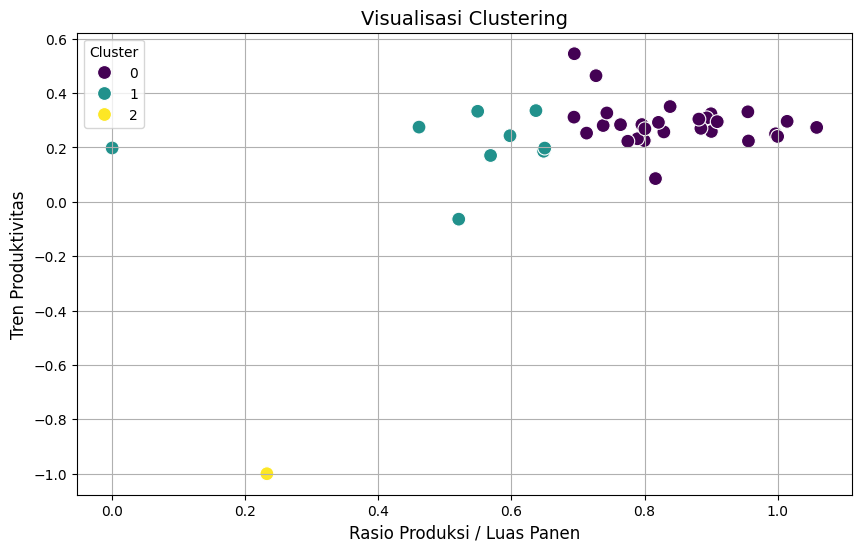

In [20]:
# Visualisasi clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustering_data['Rasio_Produksi_LuasPanen'],
    y=clustering_data['Tren_Produktivitas'],
    hue=clustering_data['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Visualisasi Clustering', fontsize=14)
plt.xlabel('Rasio Produksi / Luas Panen', fontsize=12)
plt.ylabel('Tren Produktivitas', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Silhouette Score: 0.809
Label ground truth tidak tersedia, ARI tidak bisa dihitung.


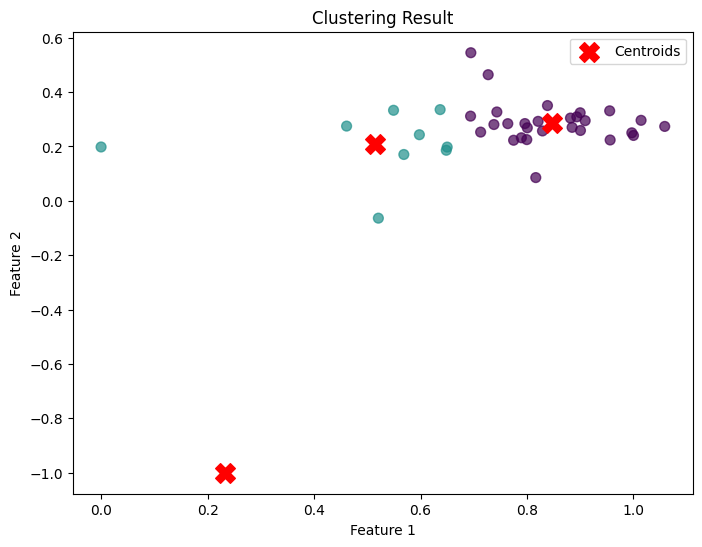

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# 1. Jalankan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_data)

# 2. Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(clustering_data, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# 3. Evaluasi dengan Adjusted Rand Index (ARI) (Jika ground truth ada)
if 'true_labels' in data.columns:
    ari_score = adjusted_rand_score(data['true_labels'], kmeans.labels_)
    print(f"Adjusted Rand Index (ARI): {ari_score:.3f}")
else:
    print("Label ground truth tidak tersedia, ARI tidak bisa dihitung.")

# 4. Visualisasi Hasil Clustering
plt.figure(figsize=(8, 6))
plt.scatter(clustering_data.iloc[:, 0], clustering_data.iloc[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
